# Junk Food Detection with YOLOv8

## Before you start

Make sure you have access to GPU. In case of any problems, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, click `Save` and try again.

In [ ]:
!nvidia-smi

Mon Jul 31 04:44:43 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

This notebook was tested with the version `YOLOv8.0.20`.

In [ ]:
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.7/214.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.4 MB/s eta 0:00:00


## Import packages

To check if the installations are correct.

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

## Download dataset from Roboflow

The first time that you install the package `roboflow`, it will ask you to restart the machine if you want to use the newest versions of some packages. If you do it, you will have to execute the other commands again.

Don't forget to change the `API_KEY` with your dataset key.

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("thesis-ehq92").project("junk-food-detection-kfher")
dataset = project.version(9).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 56.4 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=77c24b2b71dbe923e10dfcf61b9f7d135c30888d9d42ab0f83a82037106f921e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsi

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Junk-Food-Detection-9 in yolov8:: 100%|██████████| 1192/1192 [00:00<00:00, 2313.75it/s]


## Training

https://docs.ultralytics.com/quickstart/#use-ultralytics-with-python

https://docs.ultralytics.com/usage/python/

In [ ]:
%cd {HOME}

model50 = YOLO('yolov8s.pt')
model75 = YOLO('yolov8s.pt')
model100 = YOLO('yolov8s.pt')
model150 = YOLO('yolov8s.pt')

/content


100%|██████████| 21.5M/21.5M [00:00<00:00, 183MB/s]



### Train model with 50, 75, 100 and 150 epochs

In [ ]:
results50 = model50.train(data=f'{dataset.location}/data.yaml', epochs=50, imgsz=640)
results75 = model75.train(data=f'{dataset.location}/data.yaml', epochs=75, imgsz=640)
results100 = model100.train(data=f'{dataset.location}/data.yaml', epochs=100, imgsz=640)
results150 = model150.train(data=f'{dataset.location}/data.yaml', epochs=150, imgsz=640)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Junk-Food-Detection-9/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=F

### Rename training directories

We will rename the generated directories for clarity purposes.

Keep in mind that if you rerun any cell, you will encounter errors because the package will generate every time new directories.

In [ ]:
import shutil

def rename_directory(old_name, new_name):
    try:
        shutil.move(old_name, new_name)
        print(f"Directory '{old_name}' renamed to '{new_name}' successfully.")
    except FileNotFoundError:
        print(f"Directory '{old_name}' not found.")
    except FileExistsError:
        print(f"A directory with the name '{new_name}' already exists.")
    except Exception as e:
        print(f"An error occurred: {e}")

RESULTS_PATH = f'{HOME}/runs/detect/'

rename_directory(f'{RESULTS_PATH}train', f'{RESULTS_PATH}train50')
rename_directory(f'{RESULTS_PATH}train2', f'{RESULTS_PATH}train75')
rename_directory(f'{RESULTS_PATH}train3', f'{RESULTS_PATH}train100')
rename_directory(f'{RESULTS_PATH}train4', f'{RESULTS_PATH}train150')

Directory '/content/runs/detect/train' renamed to '/content/runs/detect/train50' successfully.
Directory '/content/runs/detect/train2' renamed to '/content/runs/detect/train75' successfully.
Directory '/content/runs/detect/train3' renamed to '/content/runs/detect/train100' successfully.
Directory '/content/runs/detect/train4' renamed to '/content/runs/detect/train150' successfully.


## Run predictions on the validation set
Evaluate models' performance on the validation set

In [ ]:
results50 = model50.val(model=f'{RESULTS_PATH}train50/weights/best.pt', plots=True)
results75 = model75.val(model=f'{RESULTS_PATH}train75/weights/best.pt', plots=True)
results100 = model100.val(model=f'{RESULTS_PATH}train100/weights/best.pt', plots=True)
results150 = model150.val(model=f'{RESULTS_PATH}train150/weights/best.pt', plots=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Junk-Food-Detection-9/valid/labels.cache... 33 images, 2 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.39s/it]
                   all         33         99      0.886      0.656      0.706      0.577
          french_fries         33          5      0.918        0.6      0.606      0.525
         fried_chicken         33         11          1      0.549      0.663      0.557
             ice_cream         33         19      0.914      0.947      0.971      0.855
        junk_food_logo         33         55      0.746      0.535      0.624       0.52
                  soda         33          9      0.853      0.646      0.667      0.427
Speed: 12.

### Rename validation directories

In [ ]:
rename_directory(f'{RESULTS_PATH}val', f'{RESULTS_PATH}val50')
rename_directory(f'{RESULTS_PATH}val2', f'{RESULTS_PATH}val75')
rename_directory(f'{RESULTS_PATH}val3', f'{RESULTS_PATH}val100')
rename_directory(f'{RESULTS_PATH}val4', f'{RESULTS_PATH}val150')

Directory '/content/runs/detect/val' renamed to '/content/runs/detect/val50' successfully.
Directory '/content/runs/detect/val2' renamed to '/content/runs/detect/val75' successfully.
Directory '/content/runs/detect/val3' renamed to '/content/runs/detect/val100' successfully.
Directory '/content/runs/detect/val4' renamed to '/content/runs/detect/val150' successfully.


## Run predictions on the test set

Ultralytics doesn't have a clear option if you want to run predictions on a test dataset with a `data.yaml` with a `train` and `valid` entries. That means we can execute something like `model.val(data="{dataset_location}/data_test.yaml".format(dataset_location=dataset.location))`, but the package will only look at the `valid` folder. There is no option to let the package knows that we need to run the predictions on a different path with the same `data.yaml`.

Therefore, the hacky solution we will do is to copy the `data.yaml` file and change every path entry (`train`, `valid` and `test`) to the `test` path. We generate a `data_test.yaml` to force the model to predict the `test` set.

In [ ]:
import shutil
import yaml

def copy_and_modify_yaml(input_file, output_file, new_value):
  # Copy the YAML file
  shutil.copyfile(input_file, output_file)

  # Load the YAML content
  with open(output_file, 'r') as file:
      yaml_content = yaml.safe_load(file)

  # Change the specific entries to the new value
  keys_to_change = ["val", "train", "test"]
  for key in keys_to_change:
      if key in yaml_content:
          yaml_content[key] = new_value

  # Save the modified YAML content
  with open(output_file, 'w') as file:
      yaml.dump(yaml_content, file)

data_yaml_path = f'{dataset.location}/data.yaml'
data_test_yaml_path = f'{dataset.location}/data_test.yaml'
test_path_value = f'{dataset.location}/test/images'

copy_and_modify_yaml(data_yaml_path, data_test_yaml_path, test_path_value)

Then, we run the same command to validate a dataset but with the new generated `data_test.yaml`.

In [ ]:
results50 = model50.val(data=f'{dataset.location}/data_test.yaml', plots=True)
results75 = model75.val(data=f'{dataset.location}/data_test.yaml', plots=True)
results100 = model100.val(data=f'{dataset.location}/data_test.yaml', plots=True)
results150 = model150.val(data=f'{dataset.location}/data_test.yaml', plots=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
val: Scanning /content/datasets/Junk-Food-Detection-9/test/labels... 33 images, 0 backgrounds, 0 corrupt: 100%|██████████| 33/33 [00:00<00:00, 644.32it/s]
val: New cache created: /content/datasets/Junk-Food-Detection-9/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]
                   all         33        135       0.96      0.745      0.834      0.699
          french_fries         33          5      0.969          1      0.995       0.93
         fried_chicken         33         18      0.991      0.722      0.799      0.721
             hamburger         33          1      0.876          1      0.995      0.995
             ice_cream         33          5      0.944        0.8      0.895      0.735
        junk_food_logo         33         59       0.95      0.638      0.813       0.61
       

### Rename test directories

In [ ]:
rename_directory(f'{RESULTS_PATH}val', f'{RESULTS_PATH}test50')
rename_directory(f'{RESULTS_PATH}val2', f'{RESULTS_PATH}test75')
rename_directory(f'{RESULTS_PATH}val3', f'{RESULTS_PATH}test100')
rename_directory(f'{RESULTS_PATH}val4', f'{RESULTS_PATH}test150')

Directory '/content/runs/detect/val' renamed to '/content/runs/detect/test50' successfully.
Directory '/content/runs/detect/val2' renamed to '/content/runs/detect/test75' successfully.
Directory '/content/runs/detect/val3' renamed to '/content/runs/detect/test100' successfully.
Directory '/content/runs/detect/val4' renamed to '/content/runs/detect/test150' successfully.


## Results with the 75 epochs model (the best one)

In [ ]:
%cd {HOME}

/content


### Training set

In [ ]:
TRAINING_PATH = f'{RESULTS_PATH}/train75/'

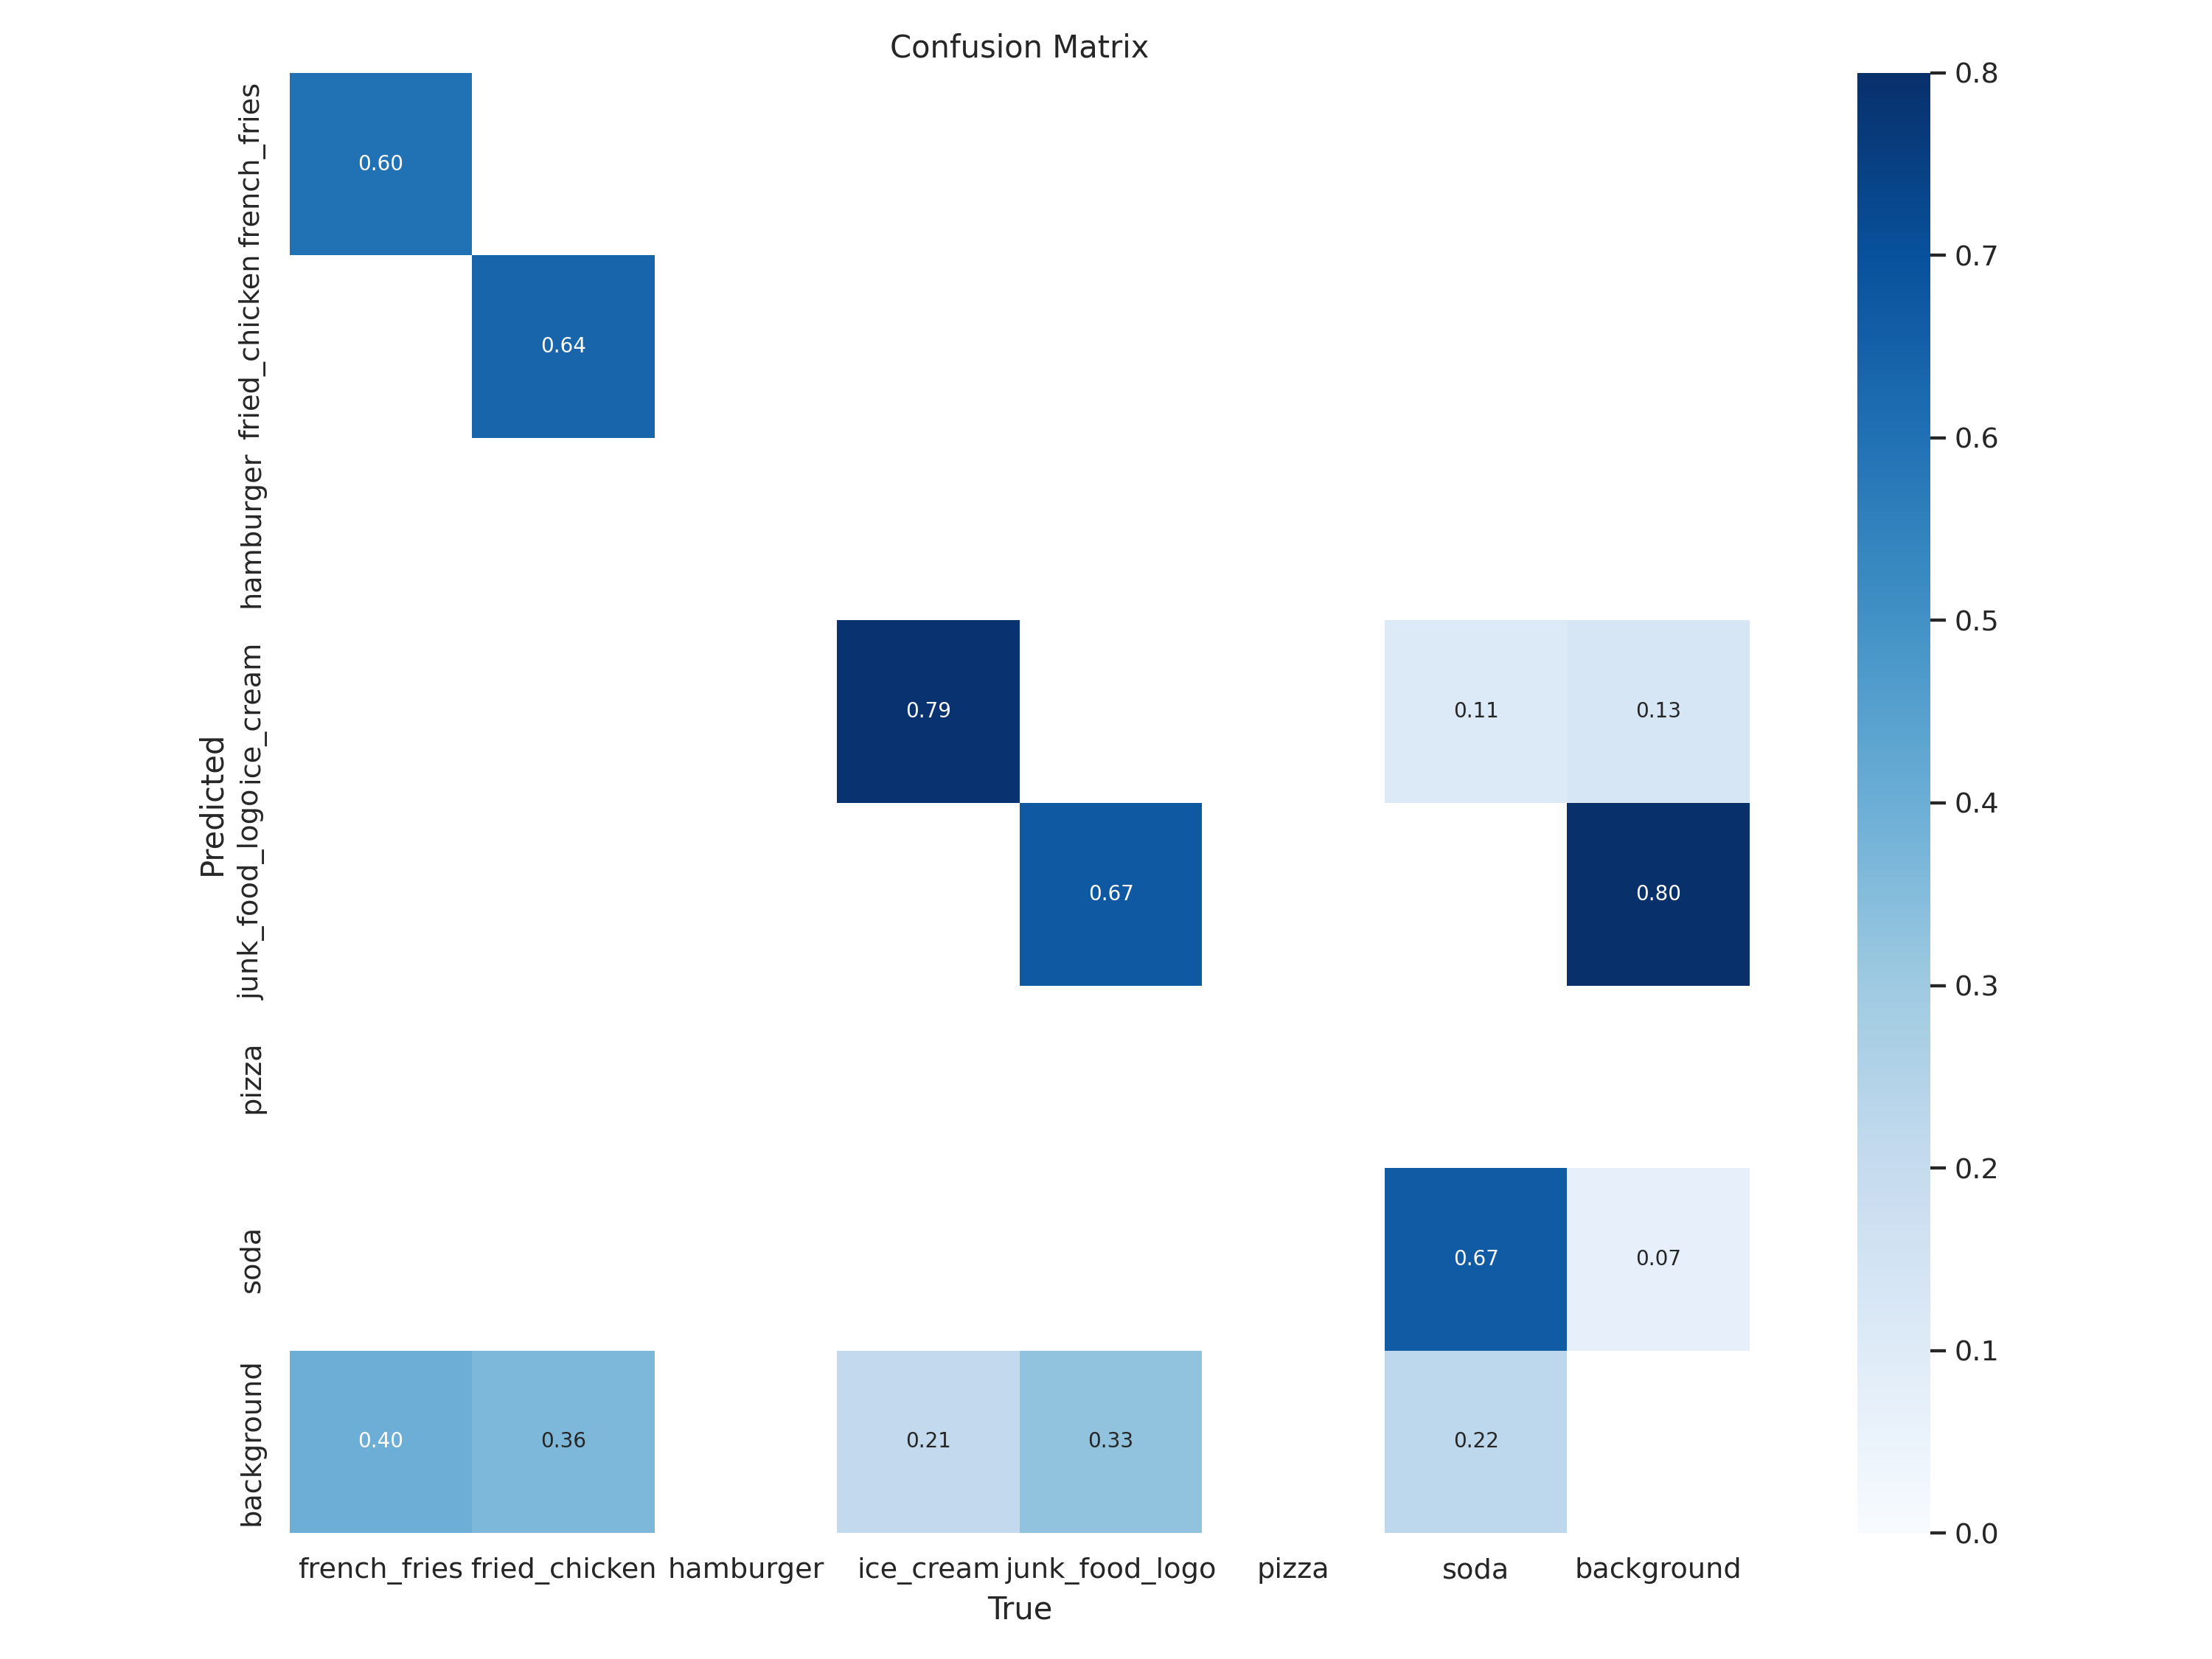

In [ ]:
Image(filename=f'{TRAINING_PATH}confusion_matrix.png', width=600)

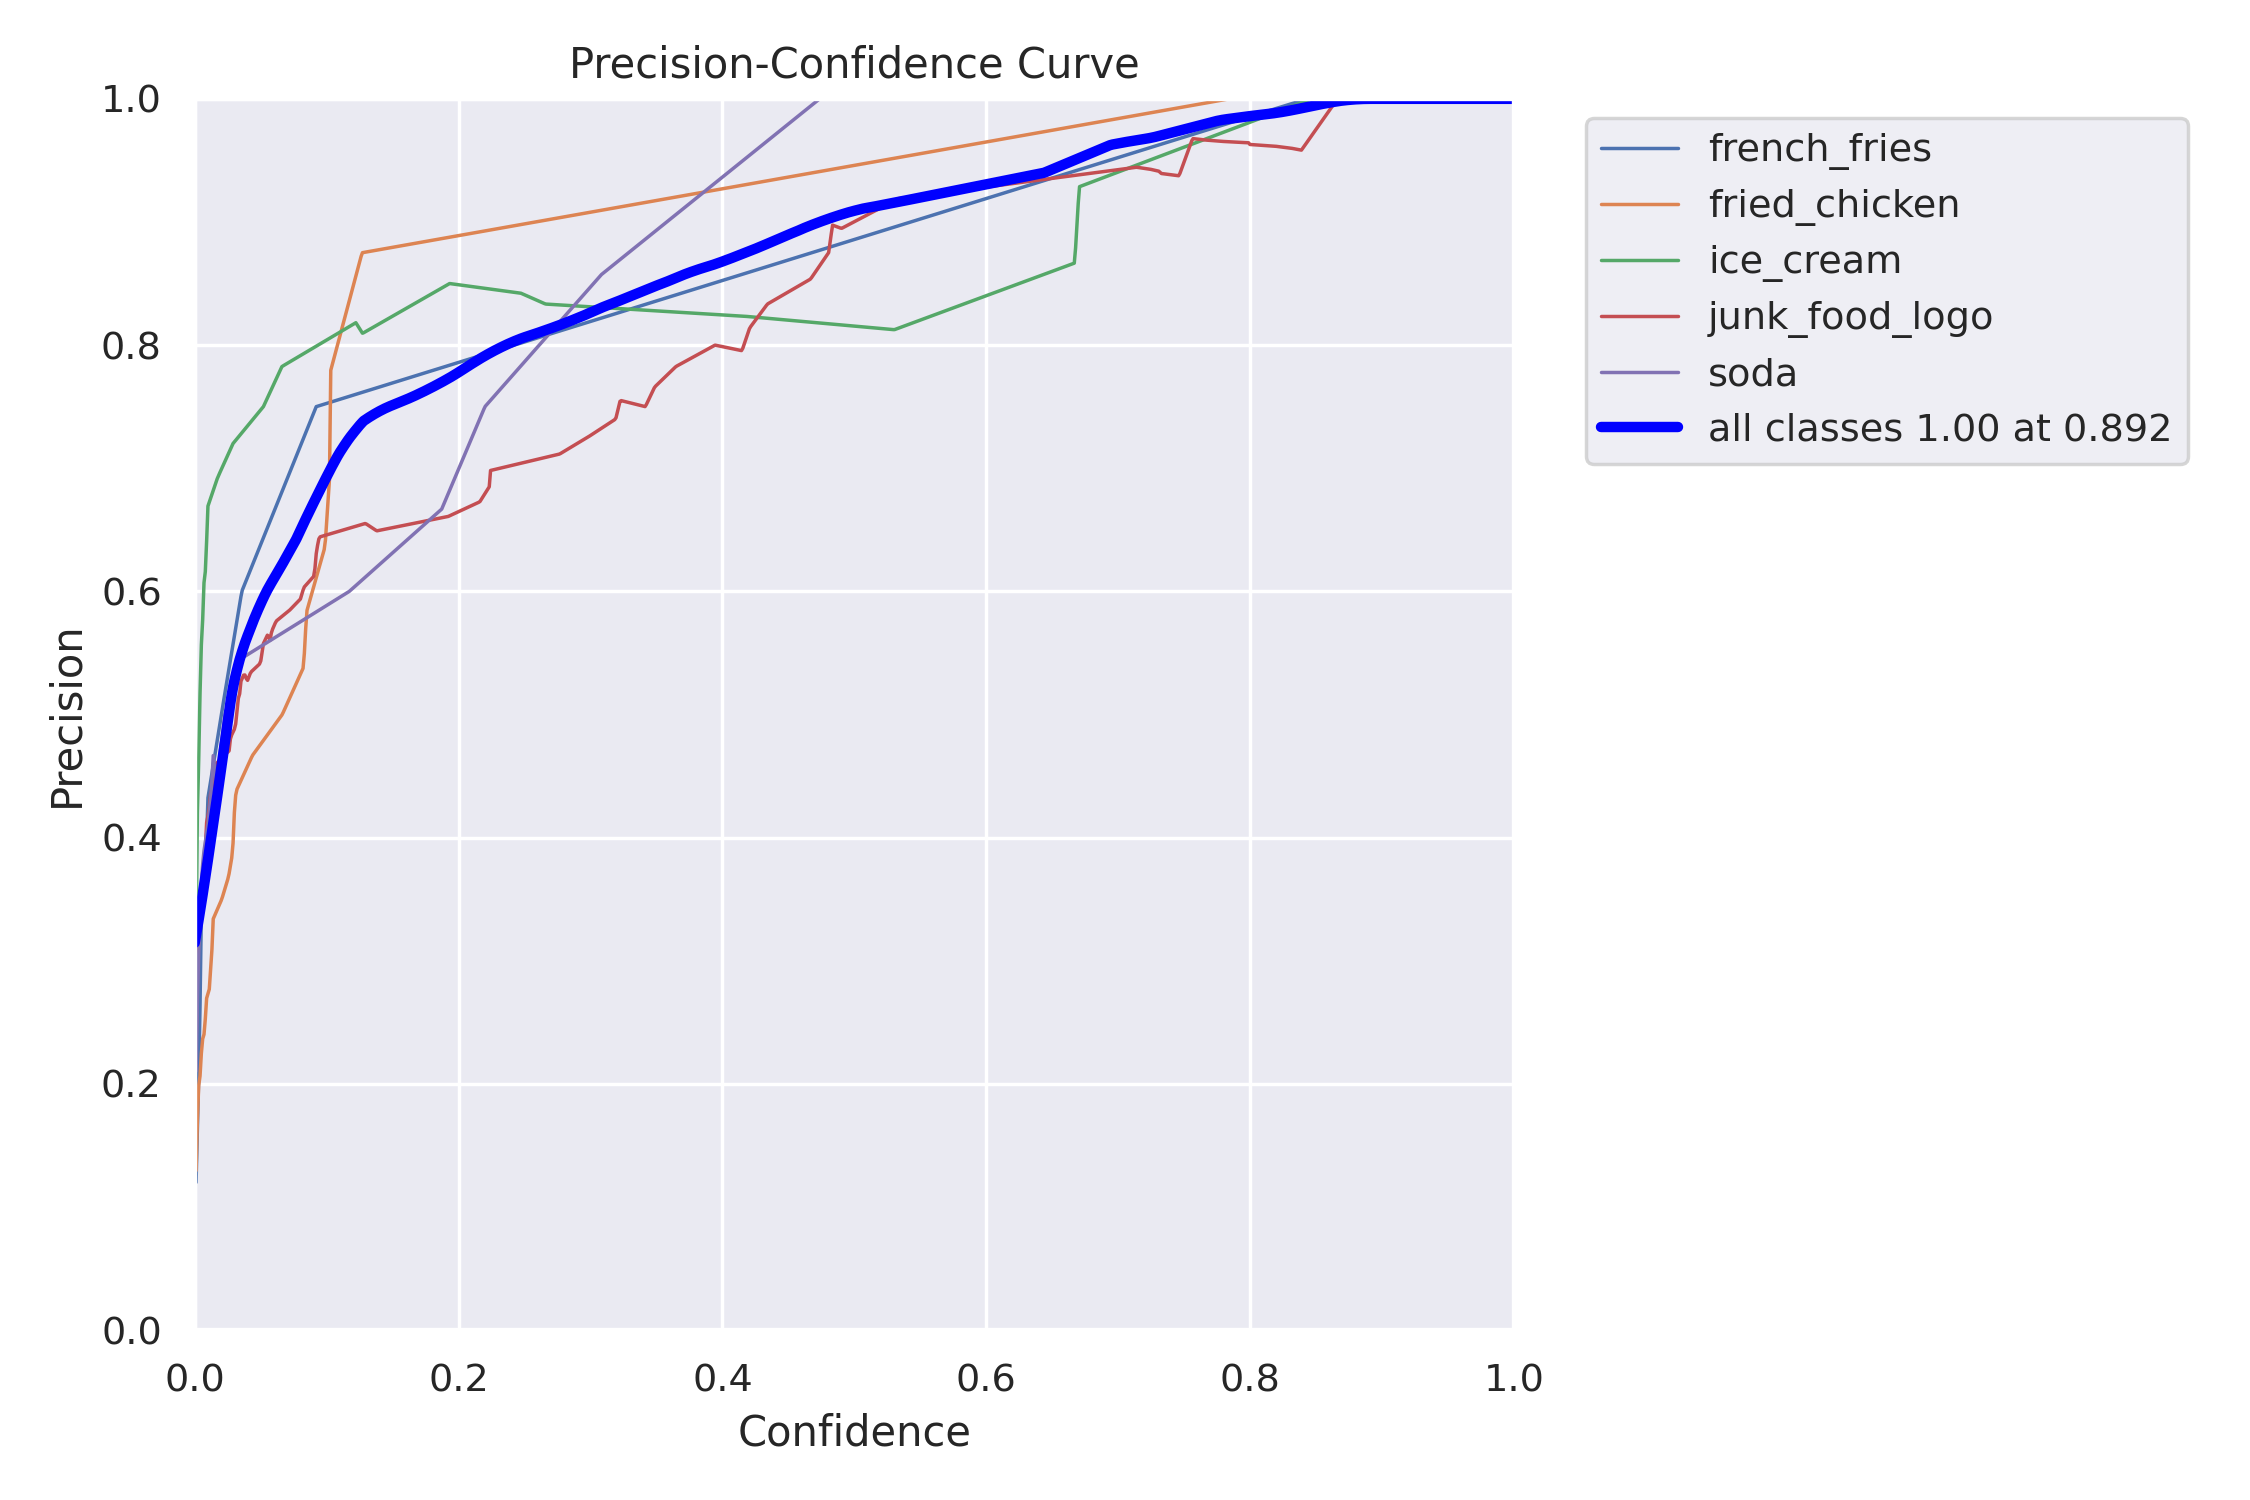

In [ ]:
Image(filename=f'{TRAINING_PATH}P_curve.png', width=600)

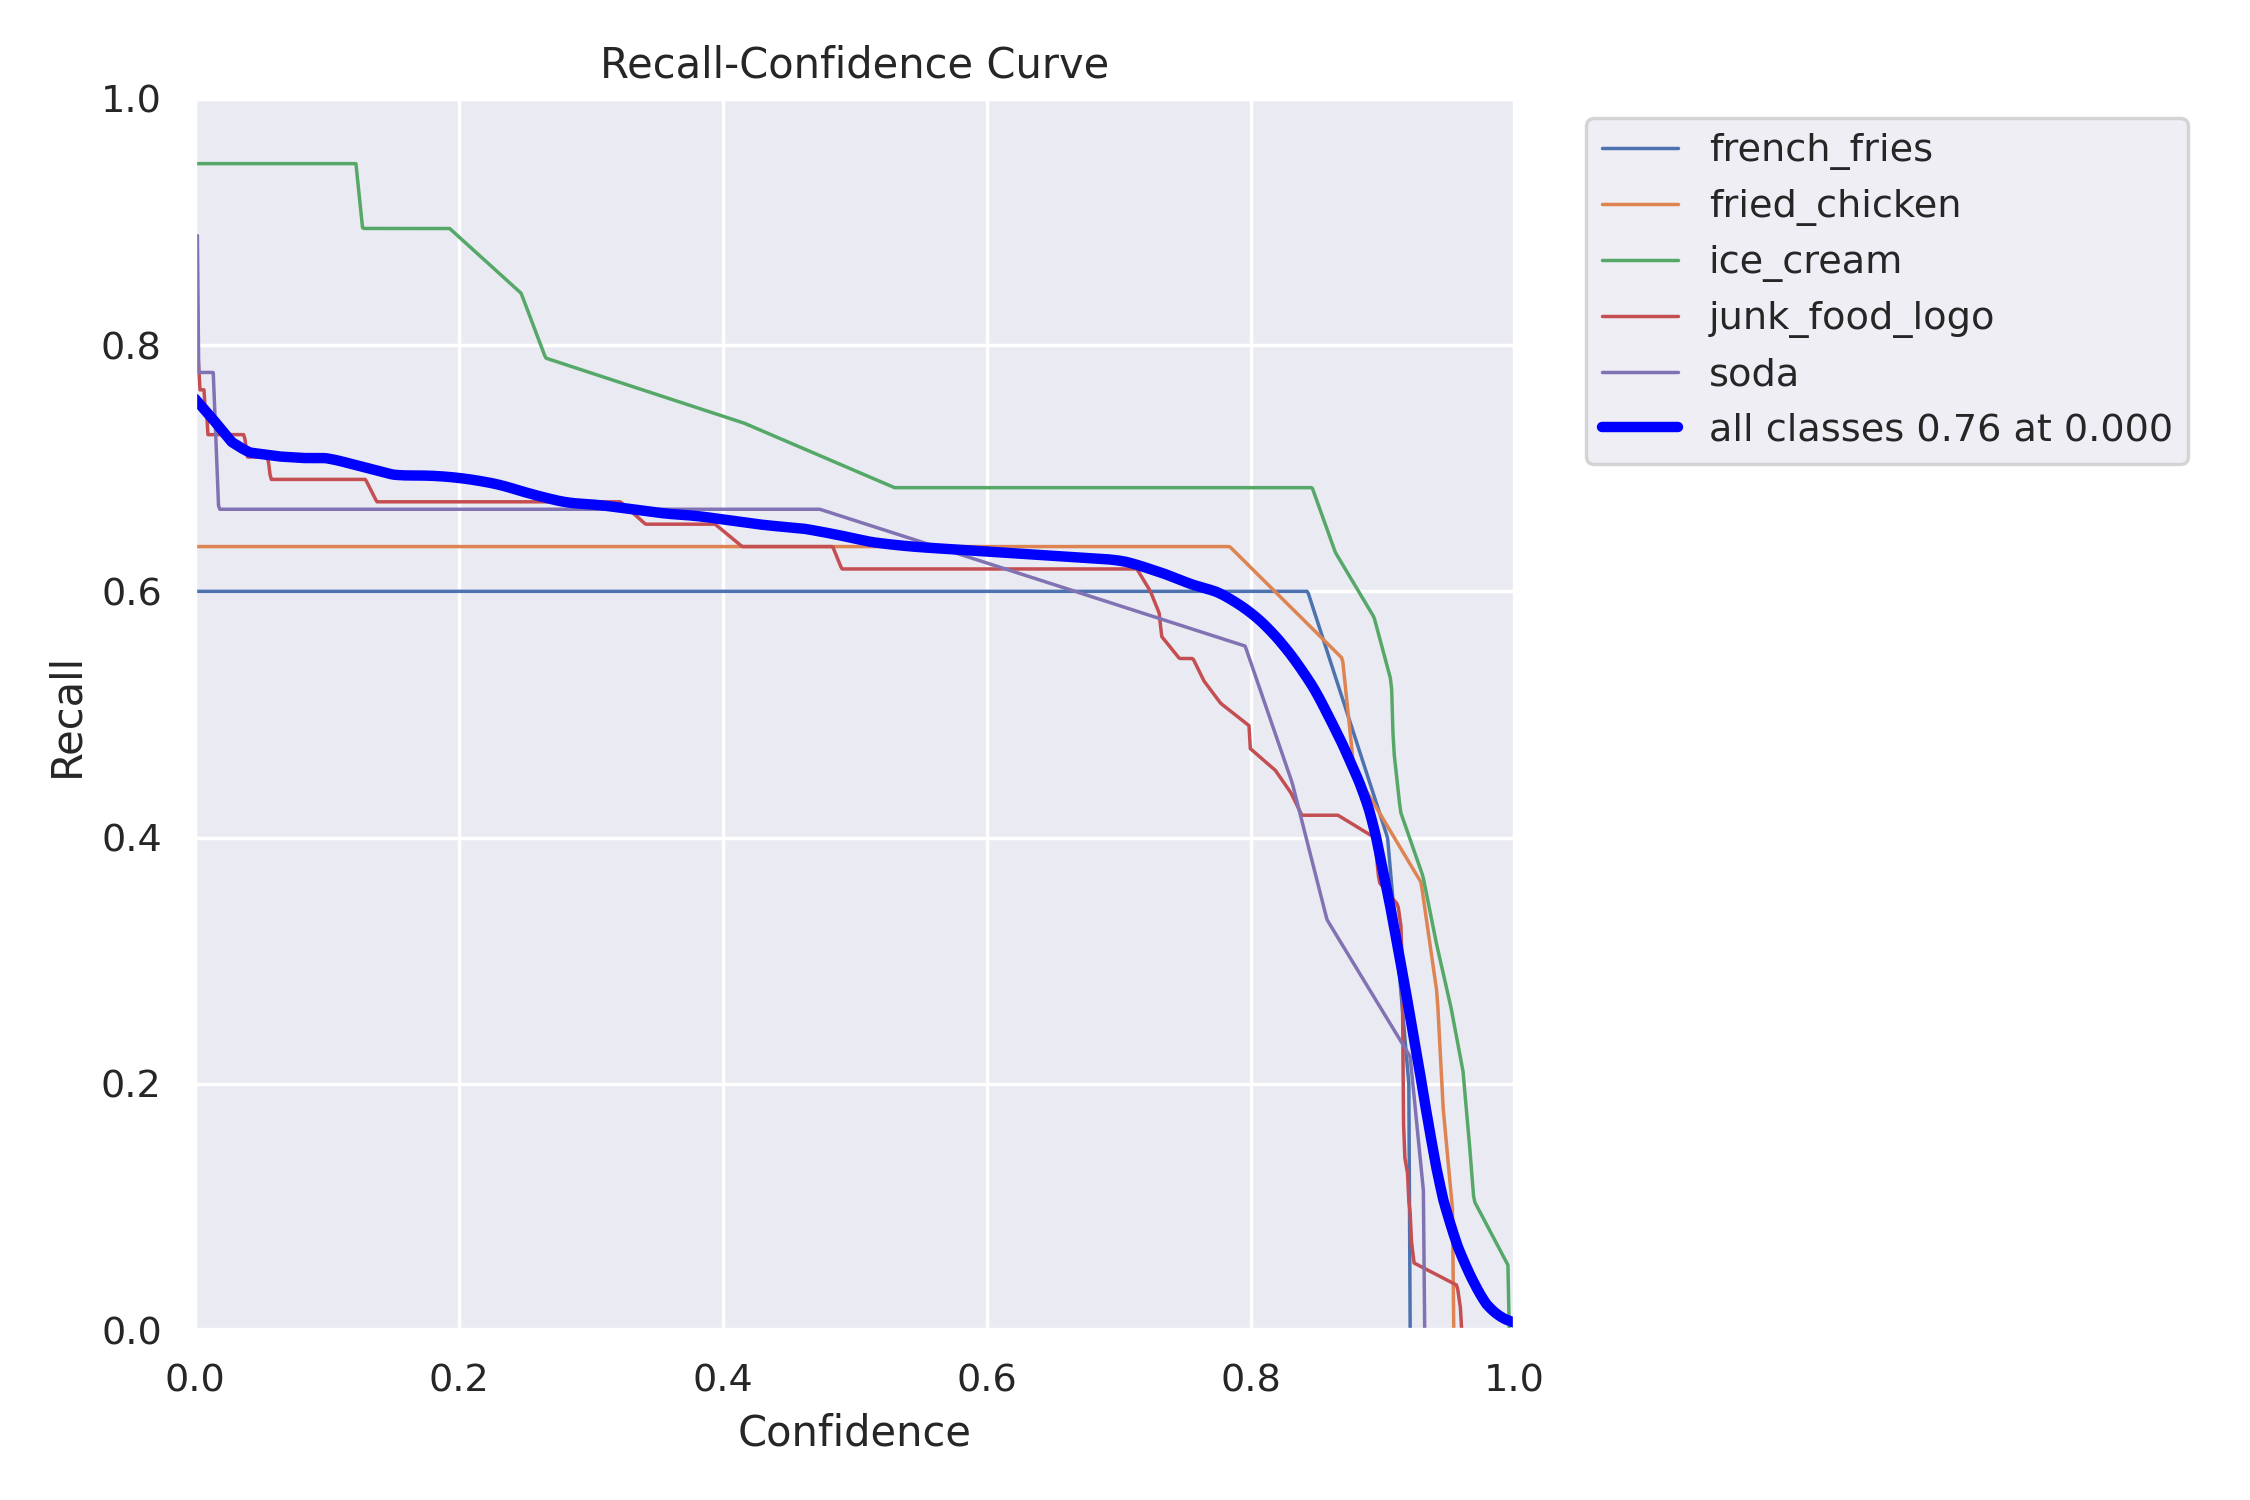

In [ ]:
Image(filename=f'{TRAINING_PATH}R_curve.png', width=600)

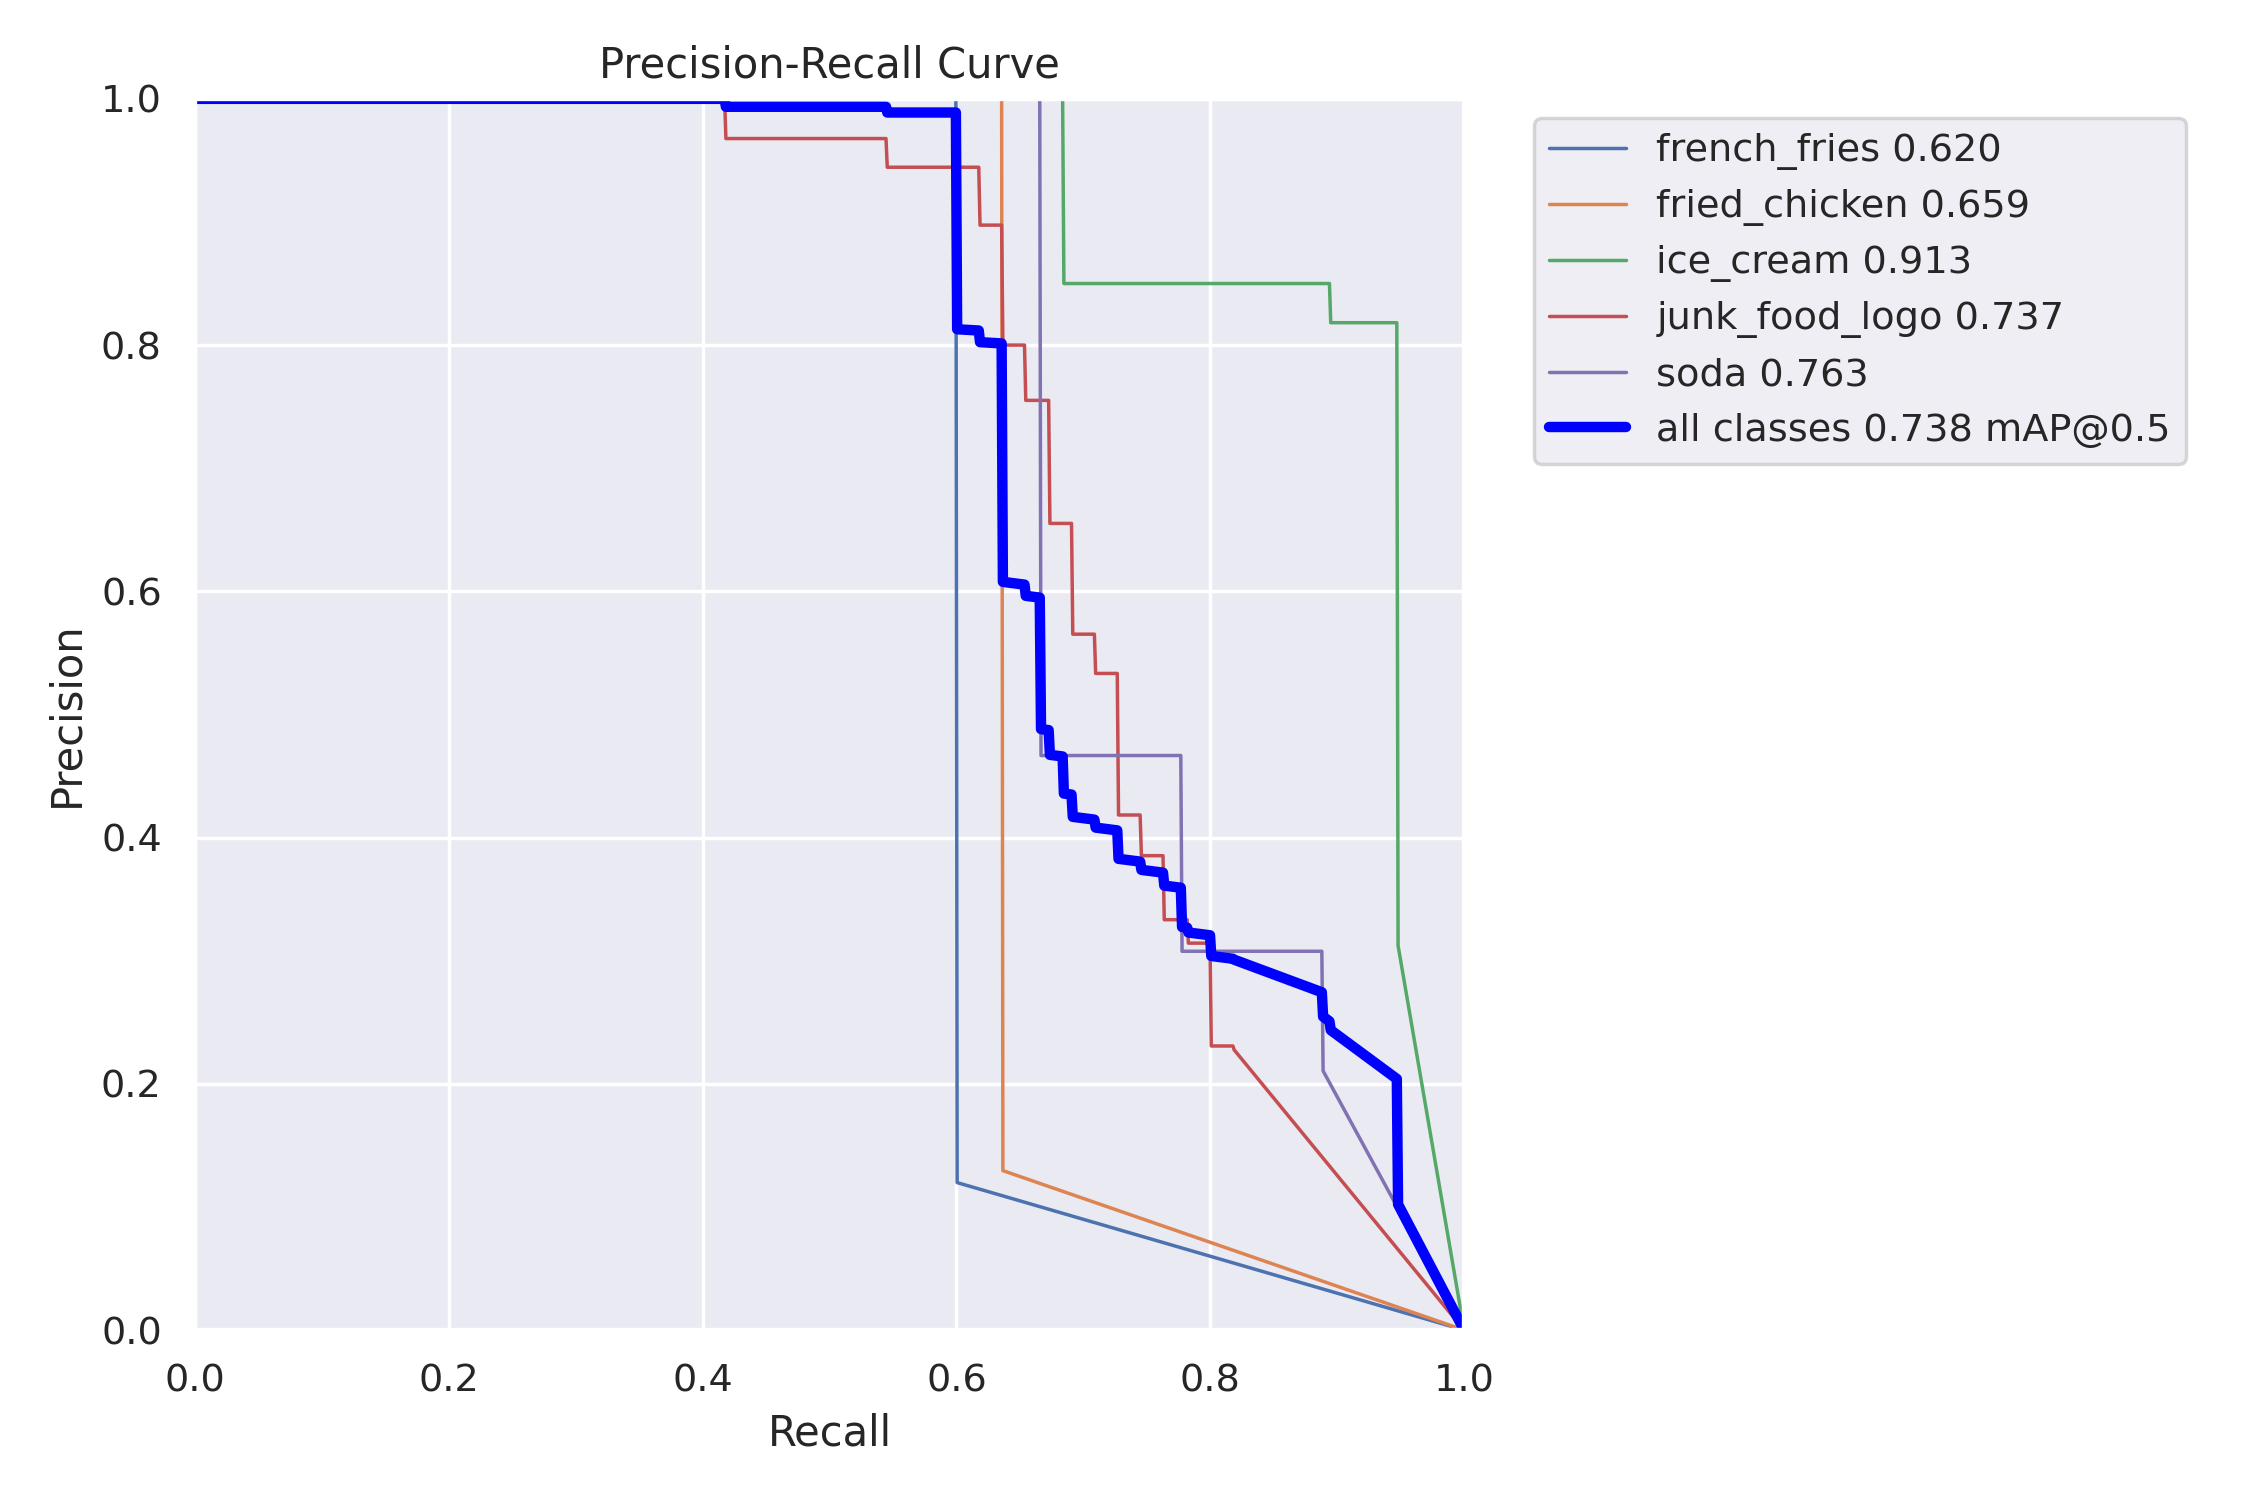

In [ ]:
Image(filename=f'{TRAINING_PATH}PR_curve.png', width=600)

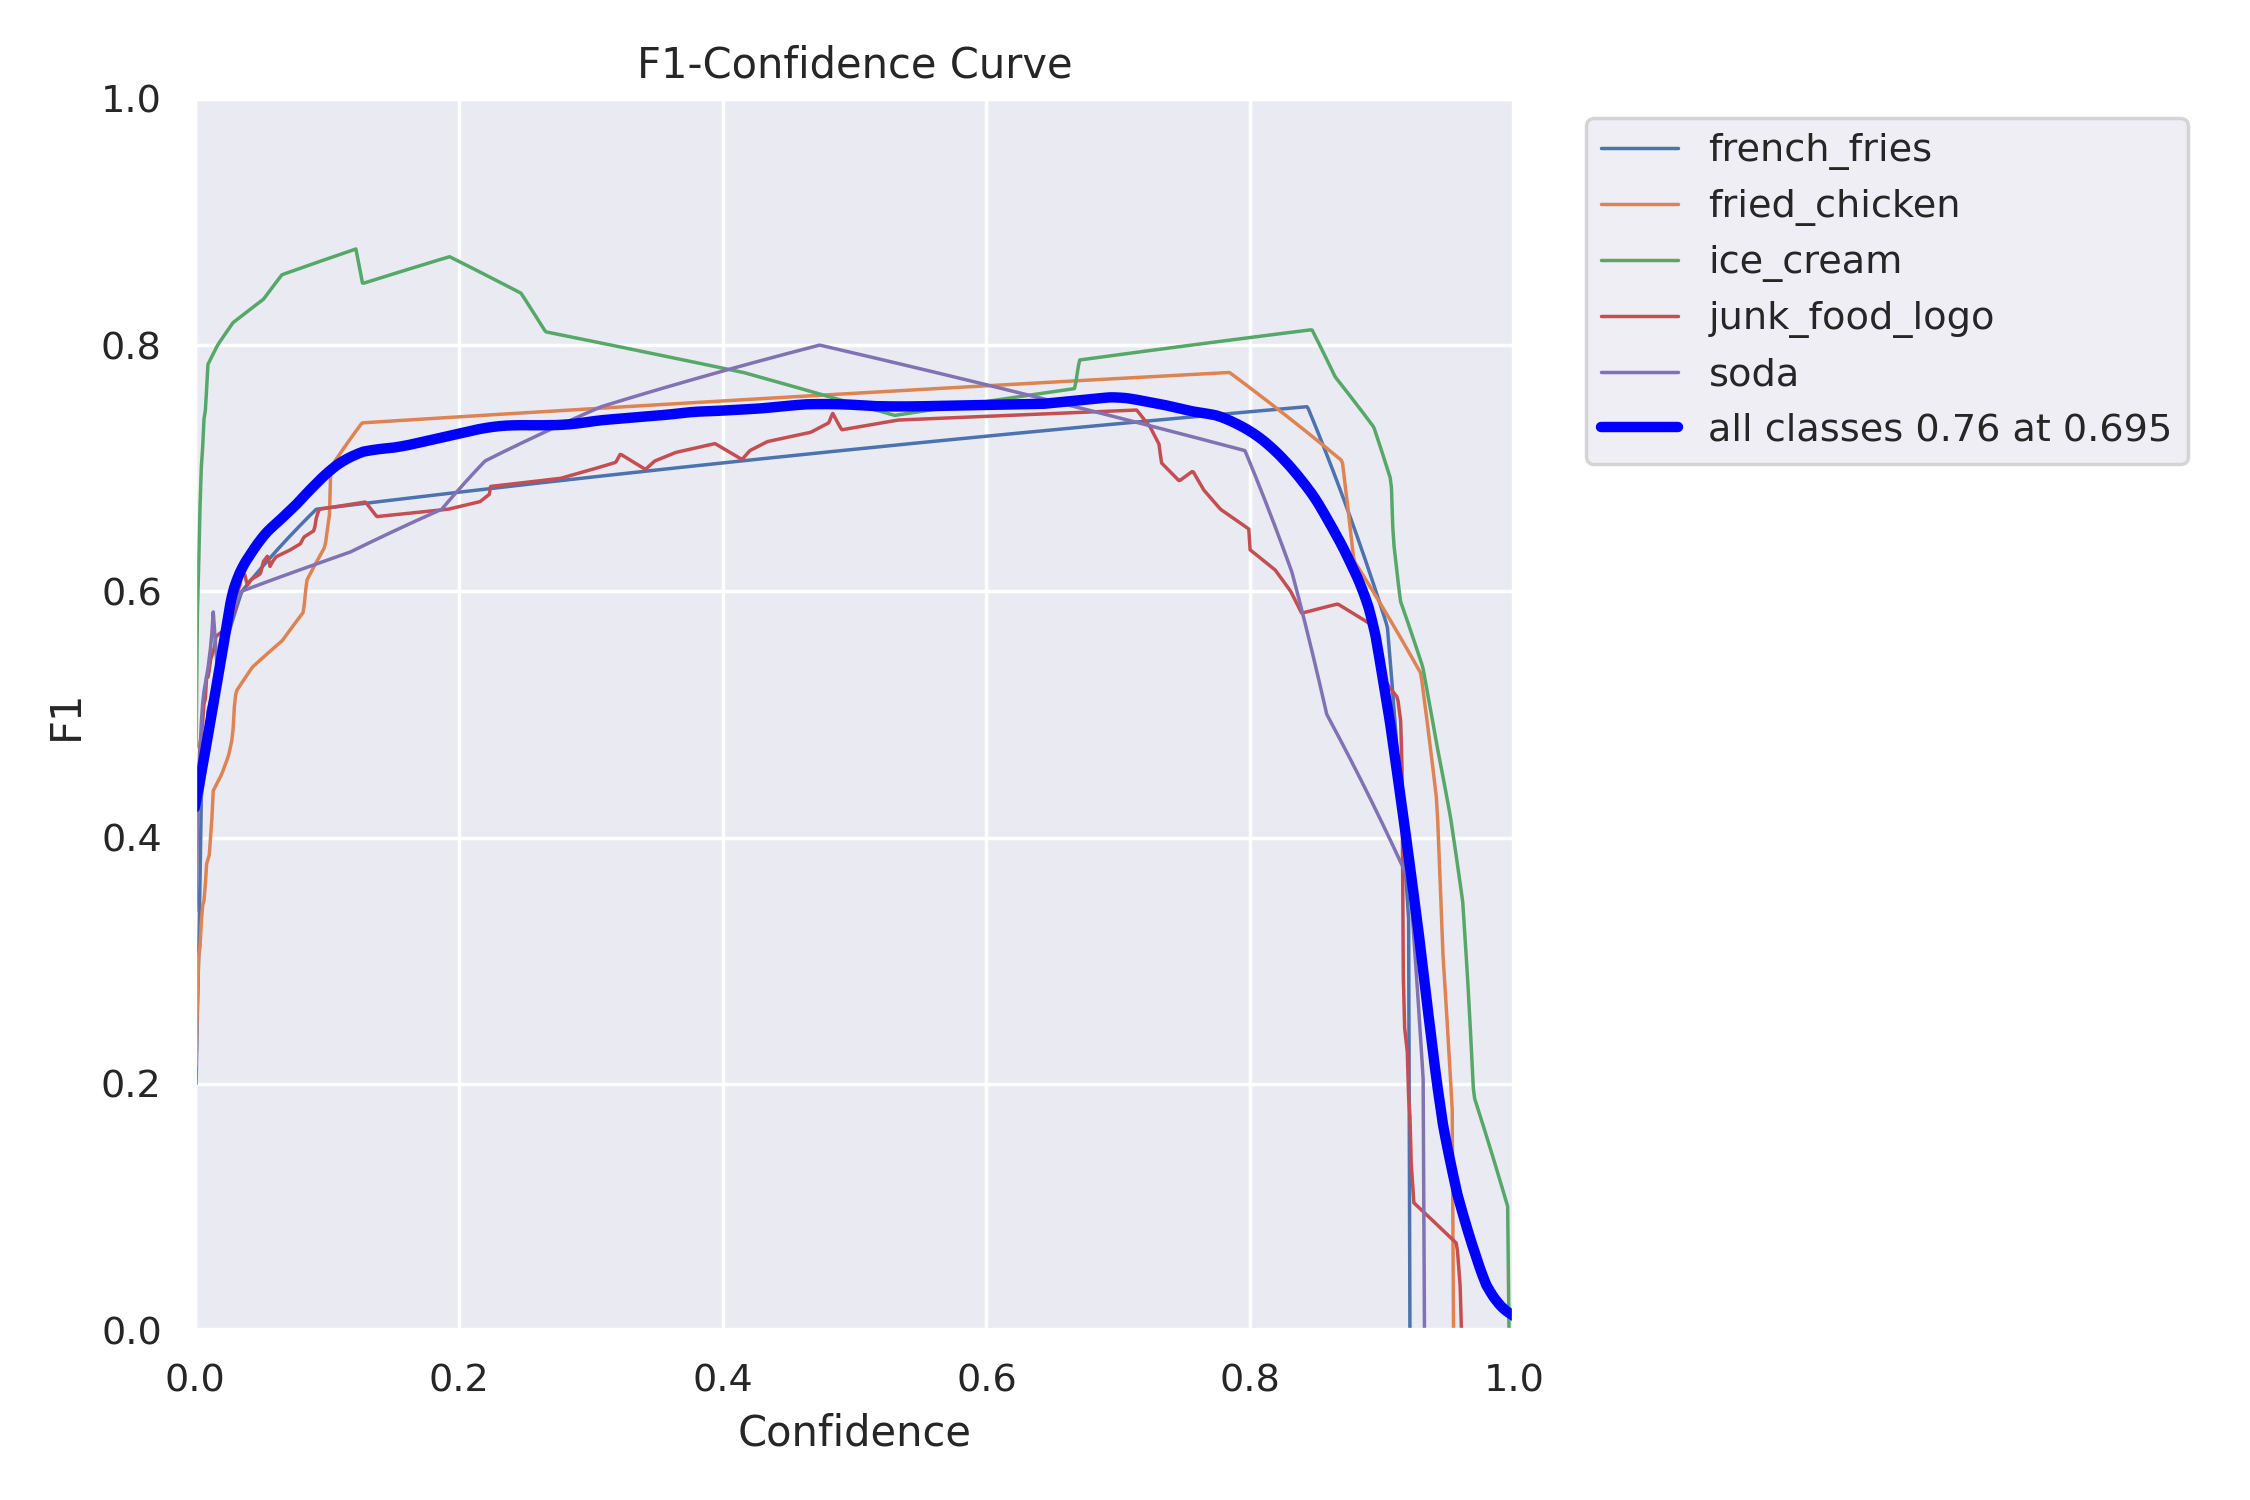

In [ ]:
Image(filename=f'{TRAINING_PATH}F1_curve.png', width=600)

### Validation set

In [ ]:
VALIDATION_PATH = f'{RESULTS_PATH}/val75/'

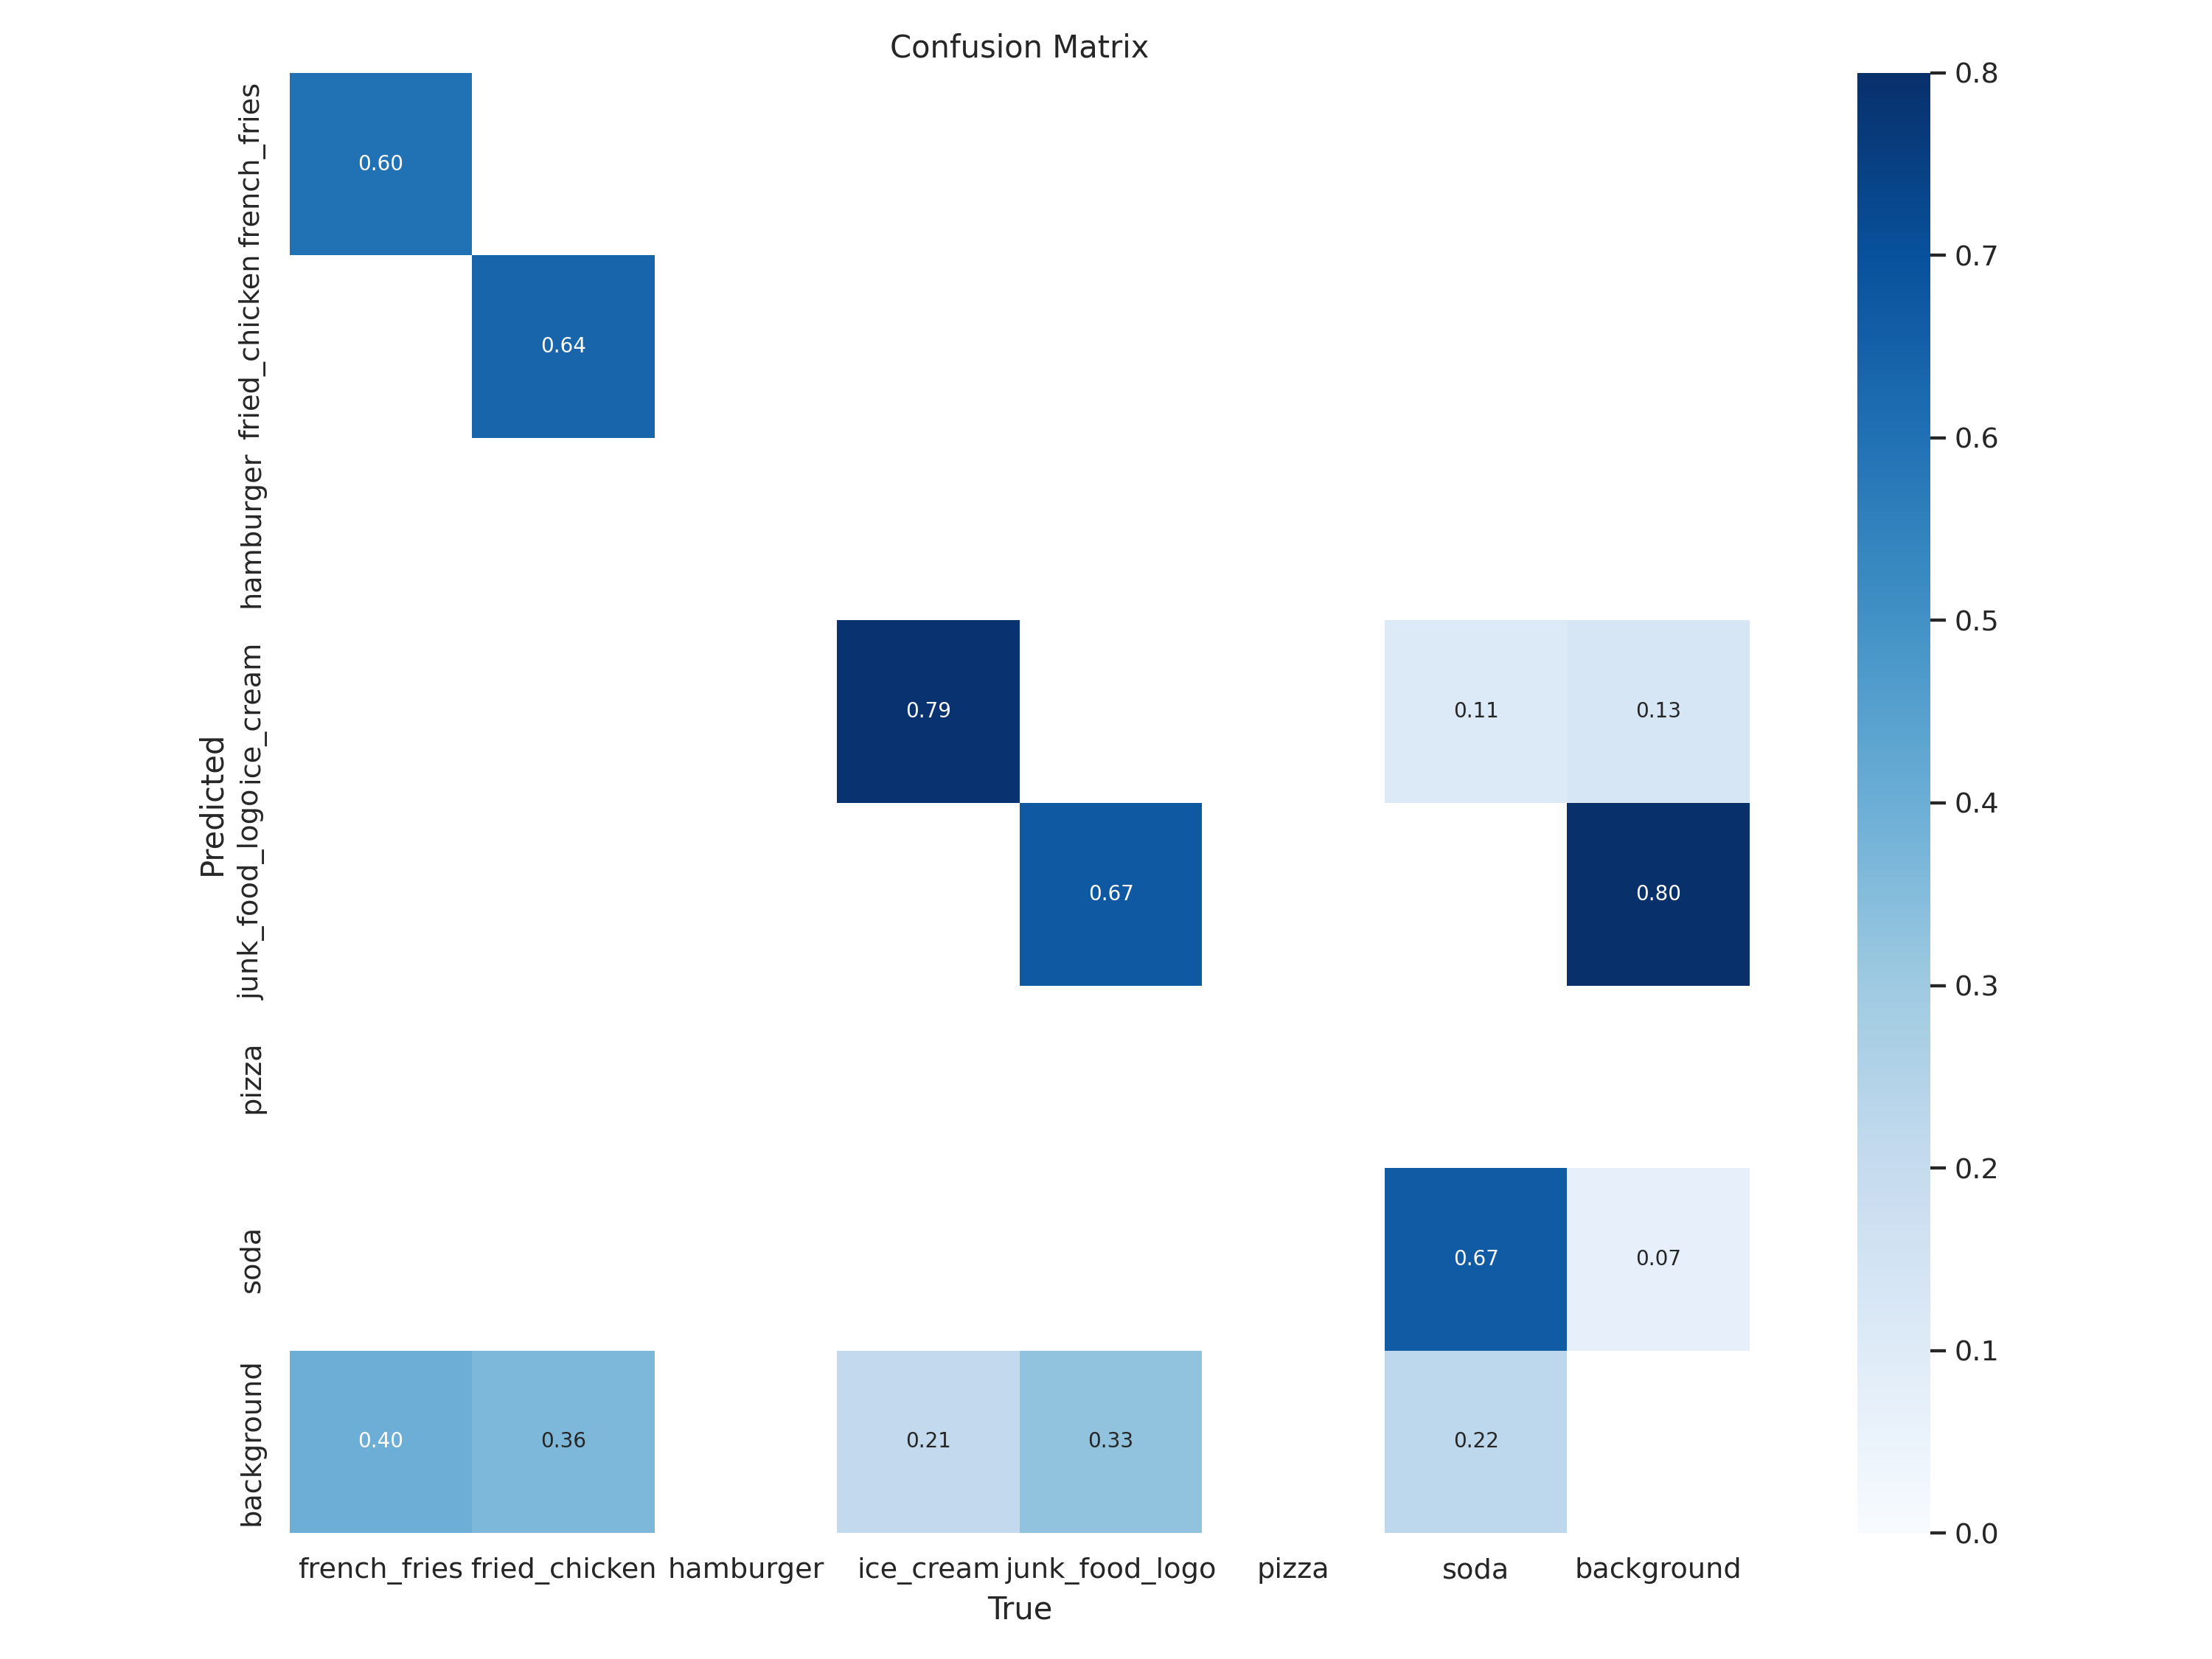

In [ ]:
Image(filename=f'{VALIDATION_PATH}confusion_matrix.png', width=600)

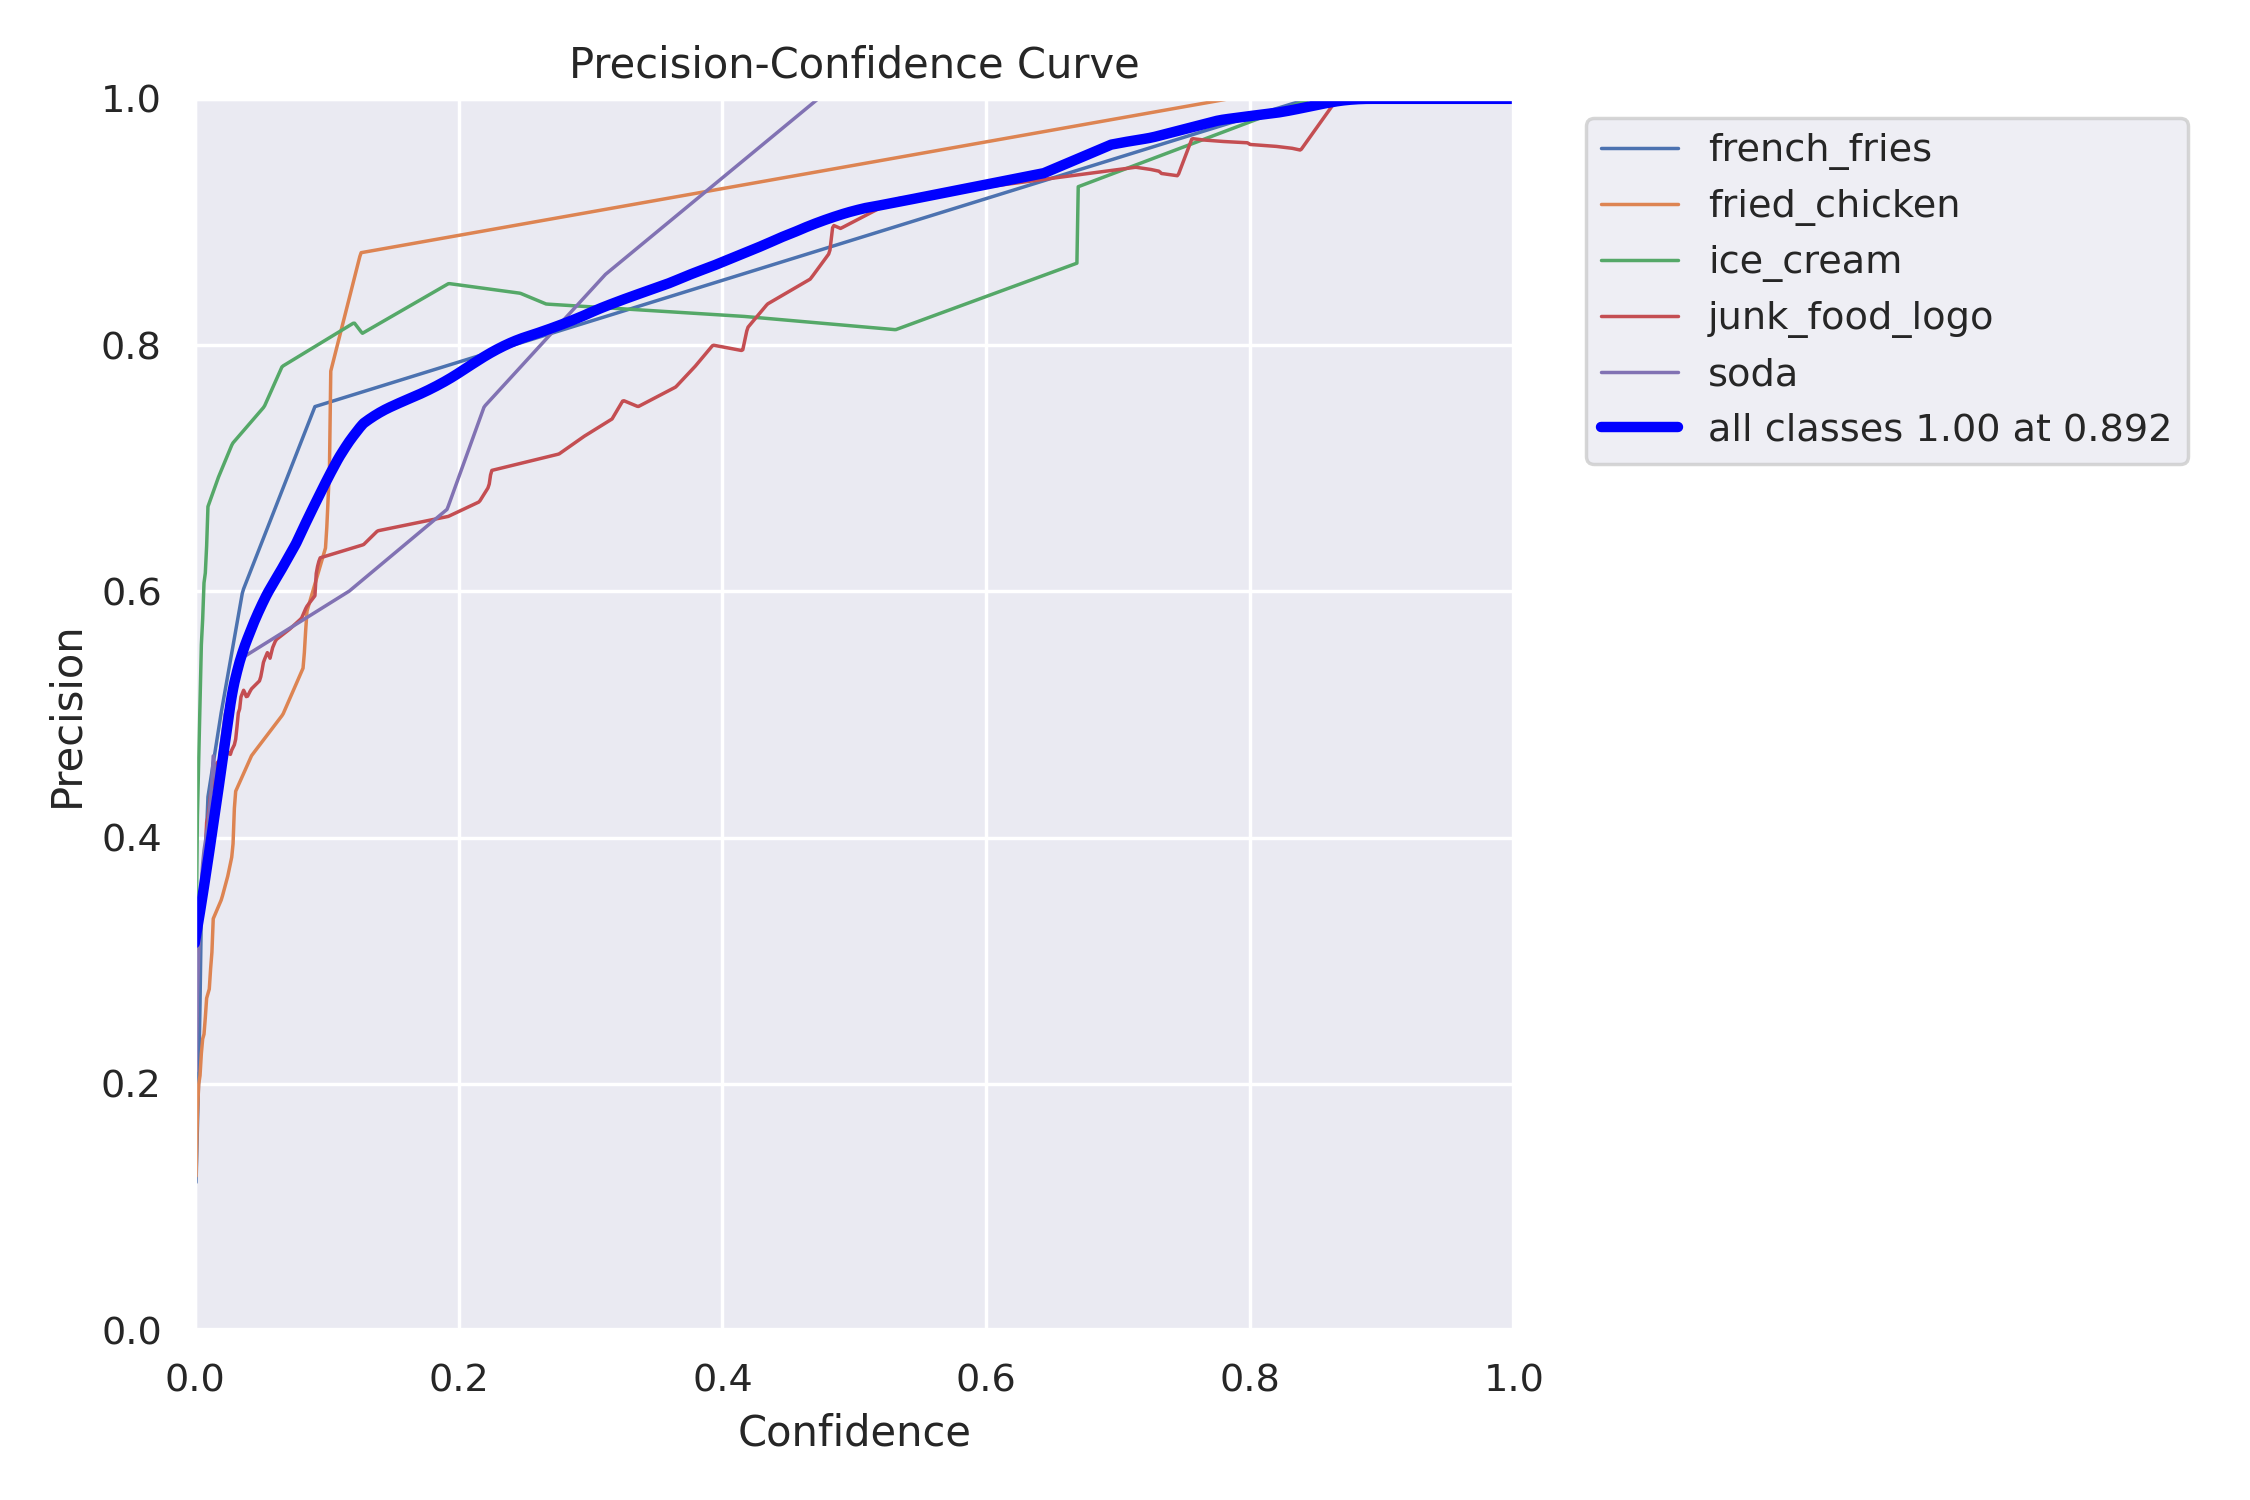

In [ ]:
Image(filename=f'{VALIDATION_PATH}P_curve.png', width=600)

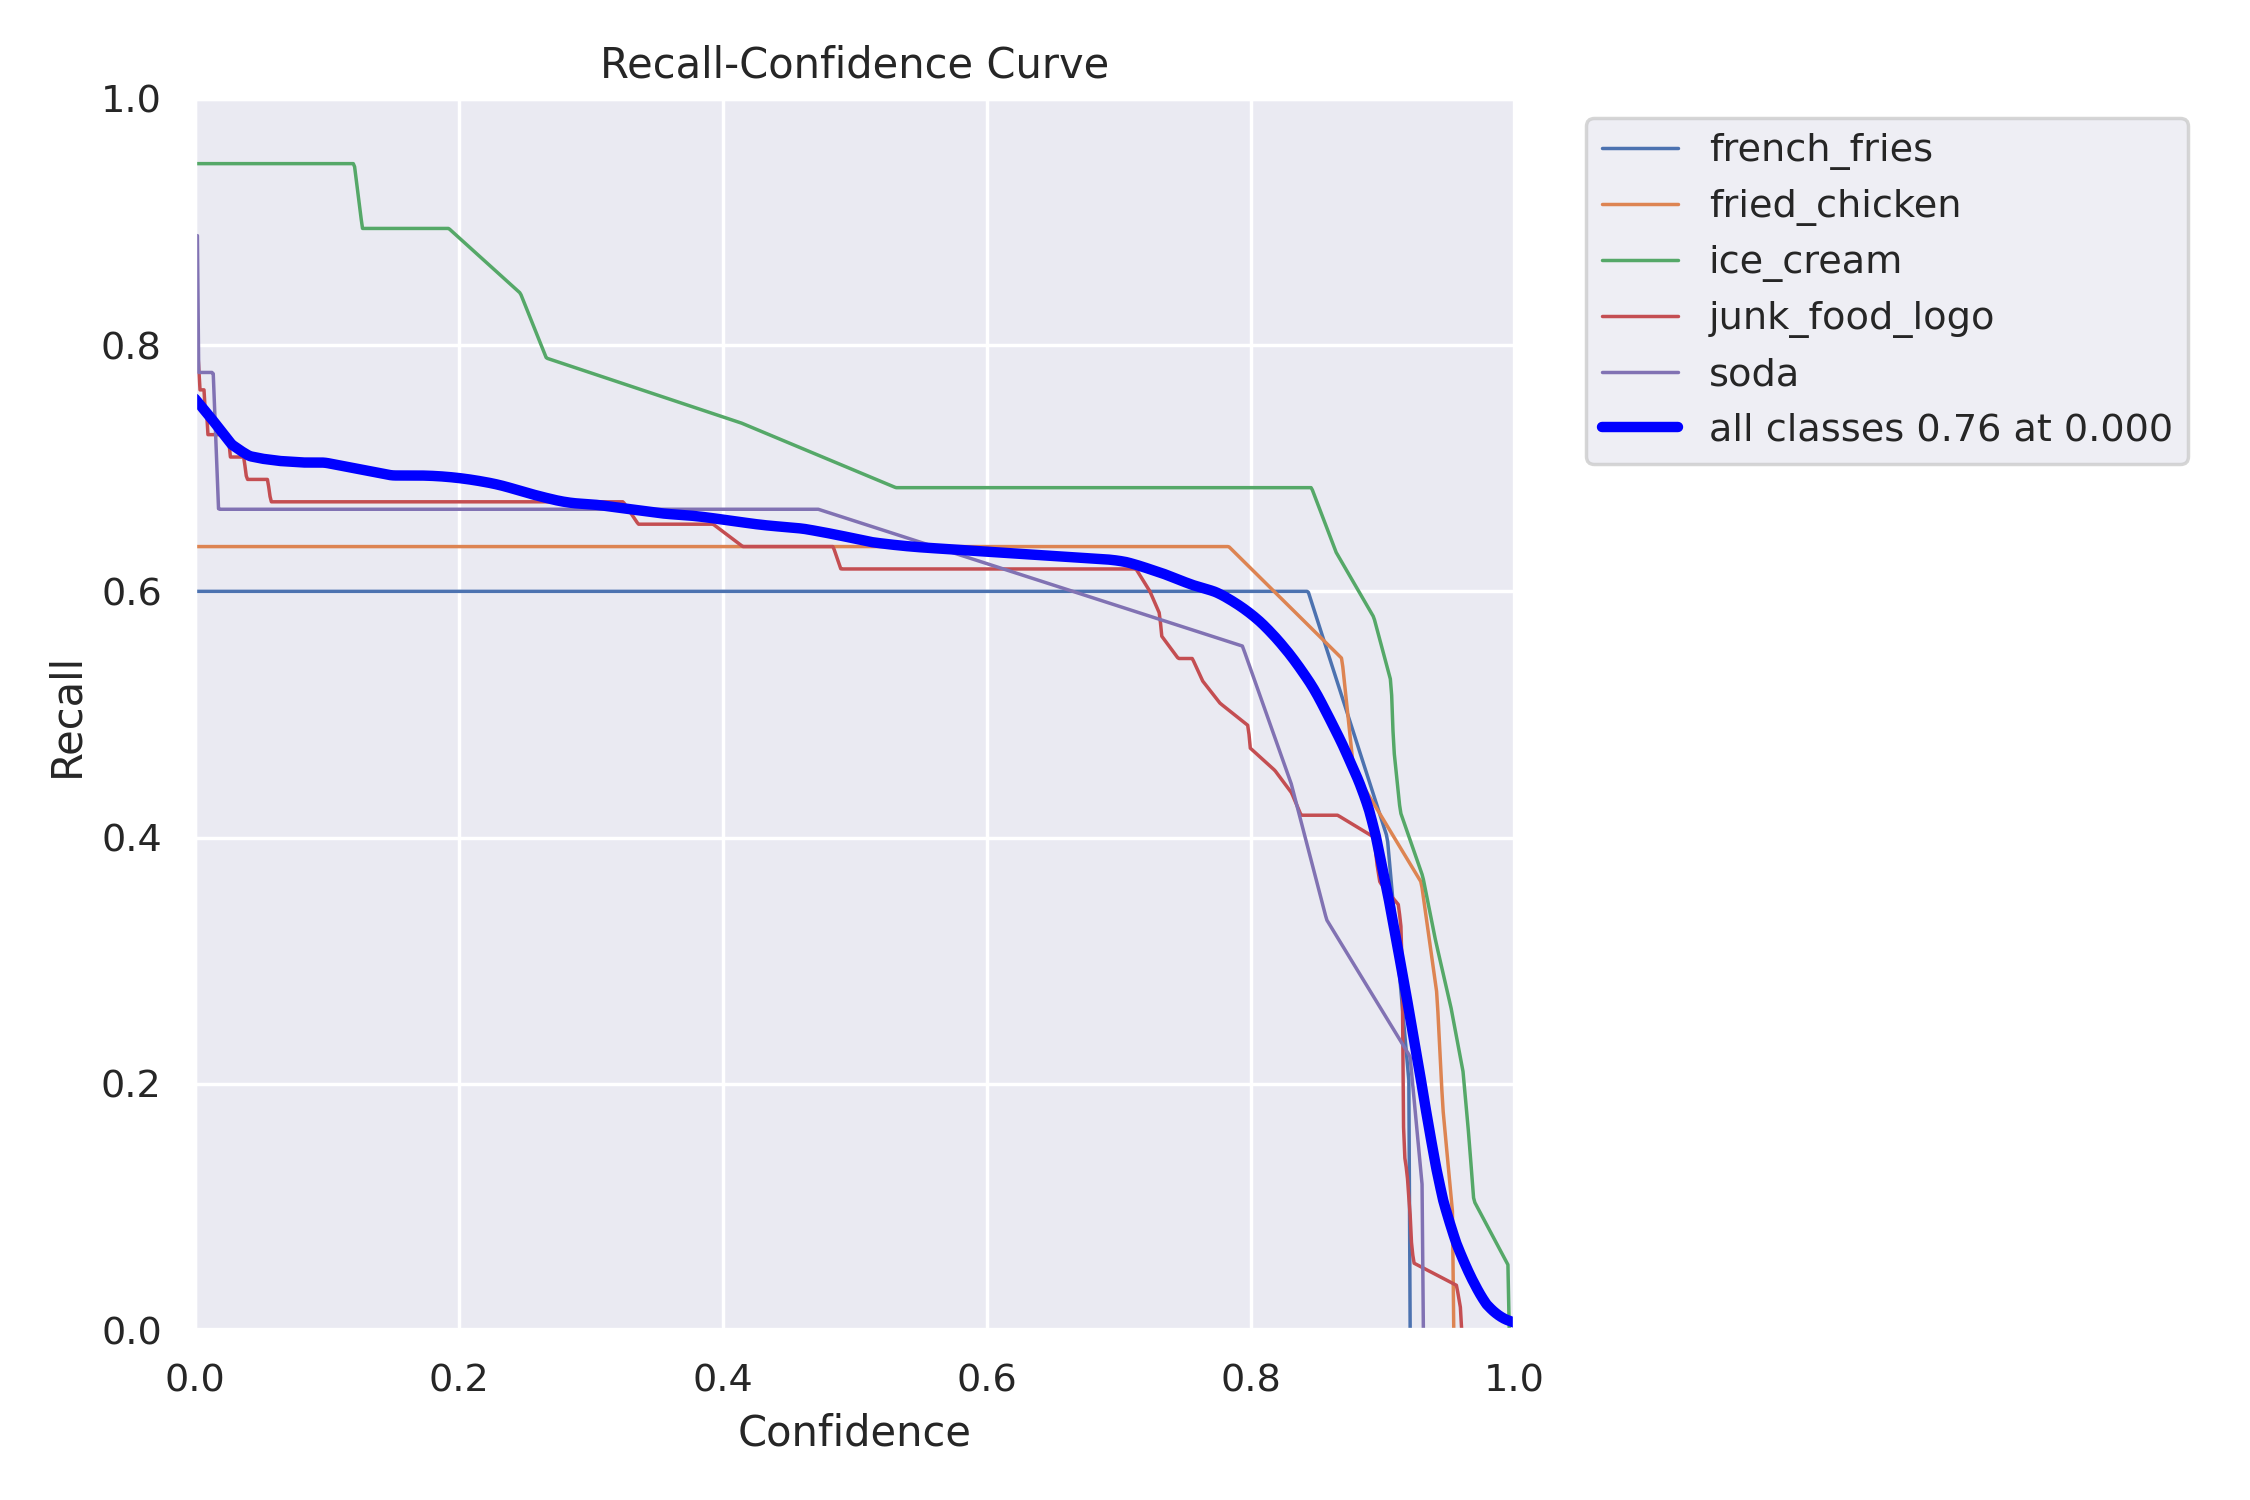

In [ ]:
Image(filename=f'{VALIDATION_PATH}R_curve.png', width=600)

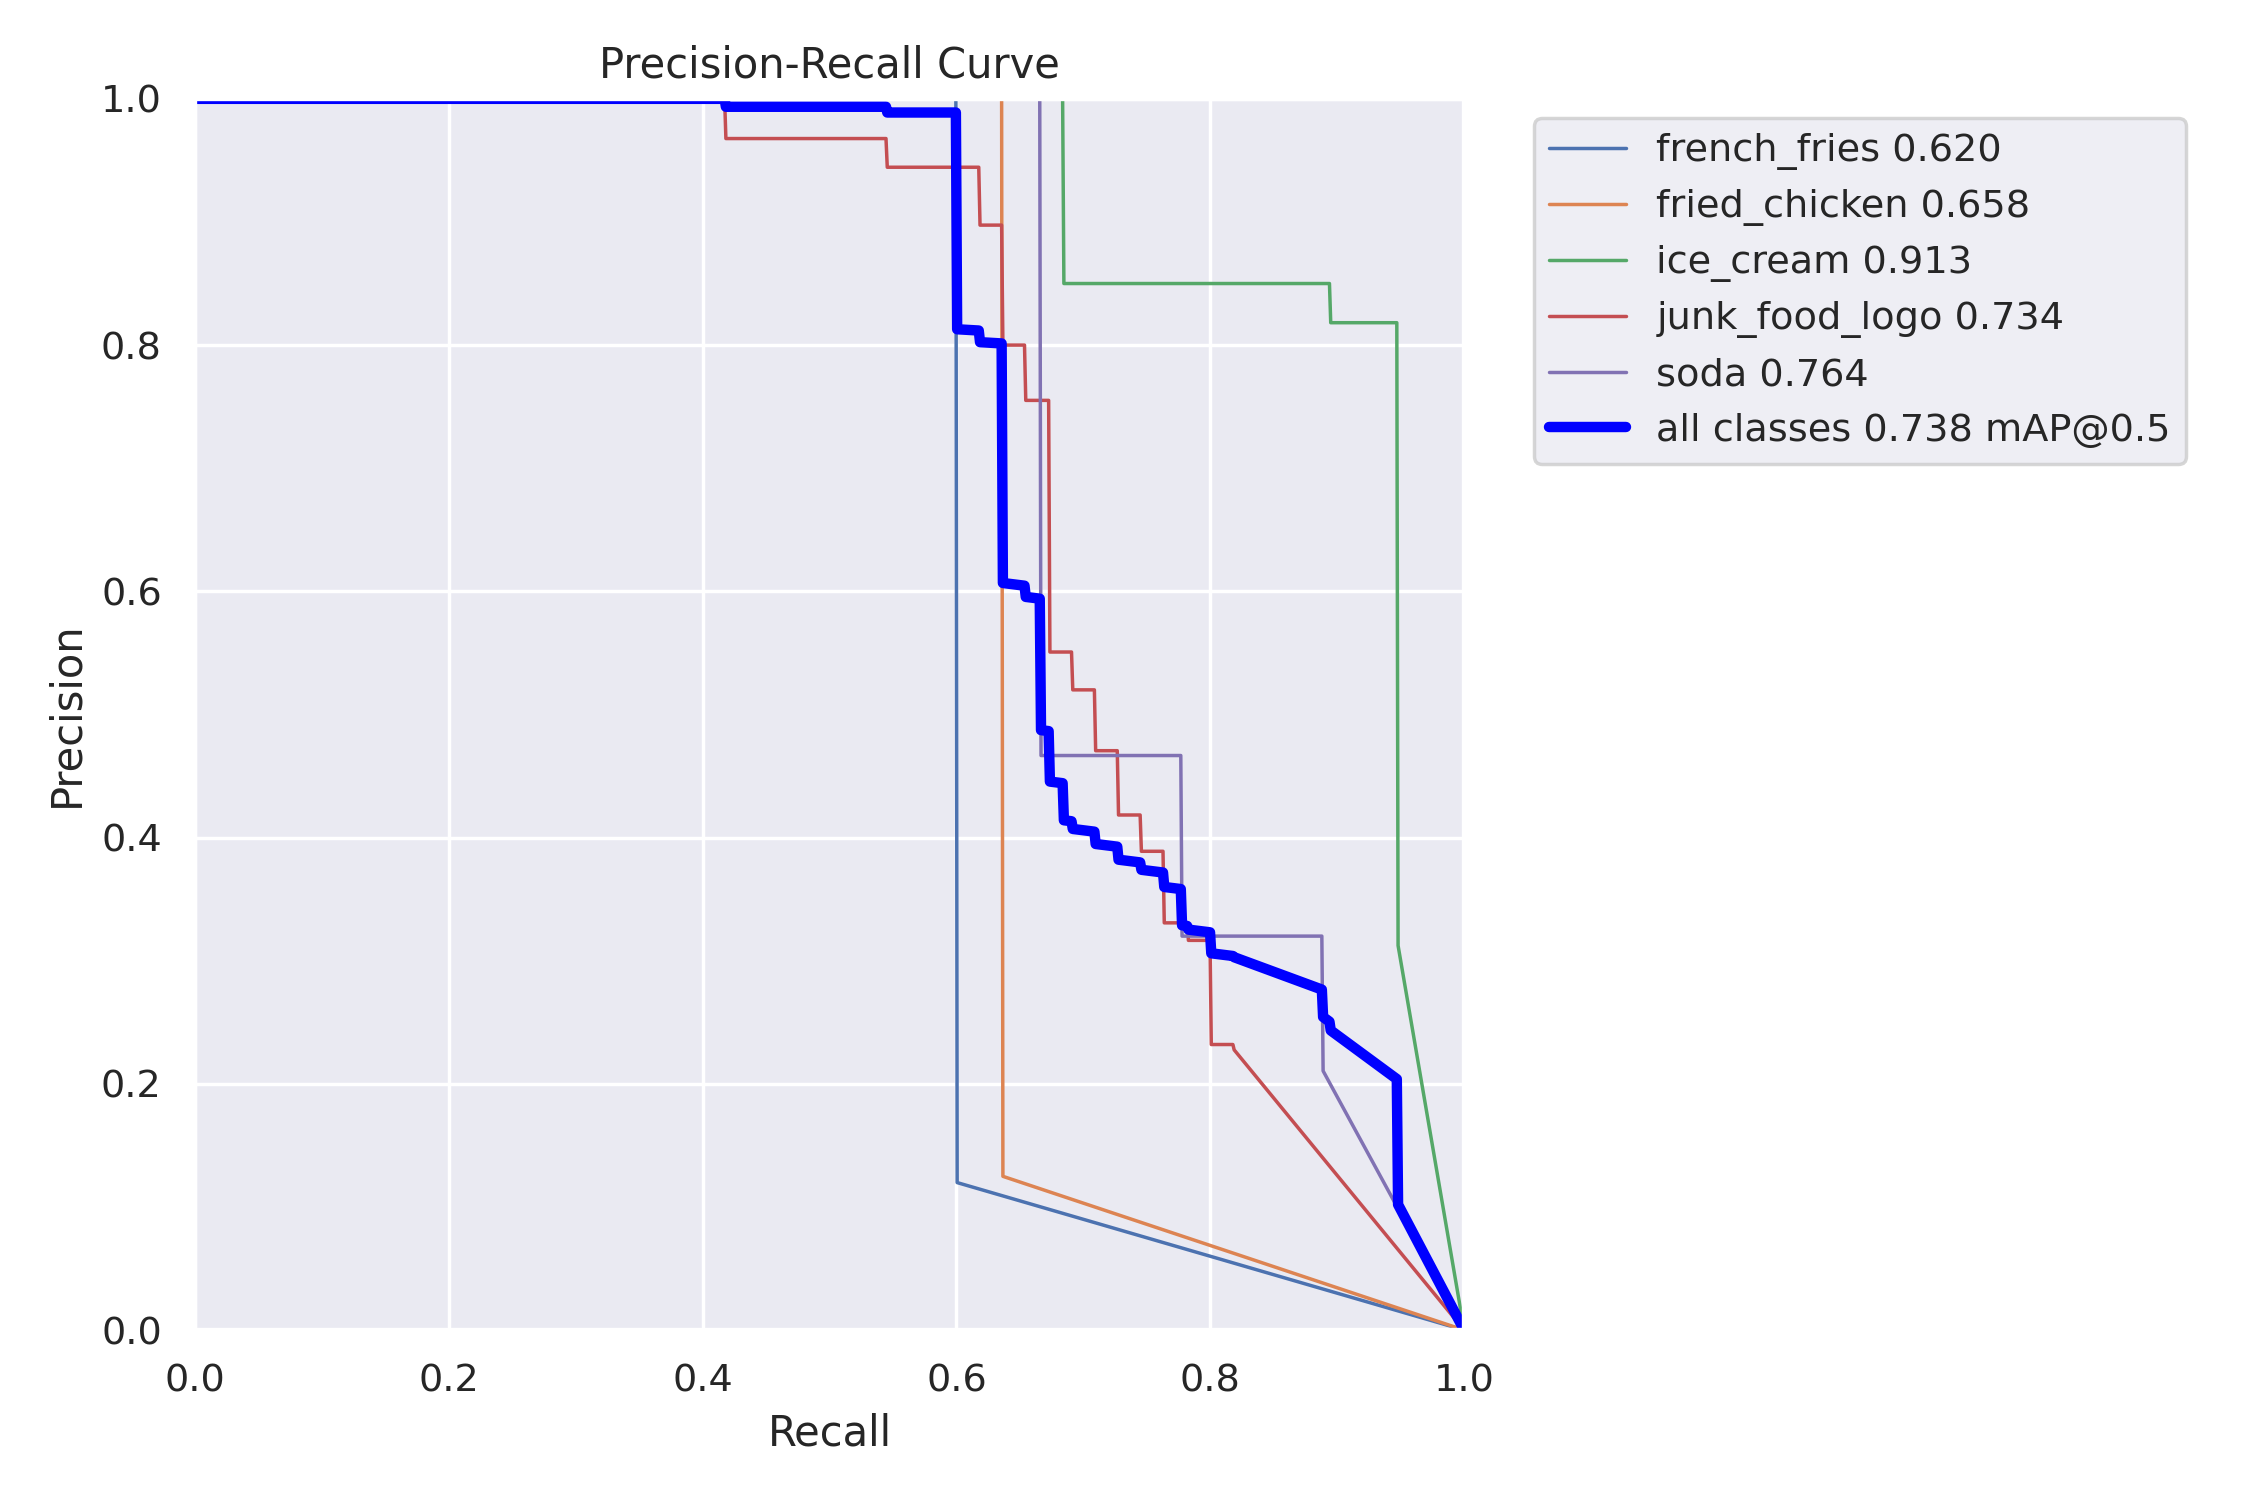

In [ ]:
Image(filename=f'{VALIDATION_PATH}PR_curve.png', width=600)

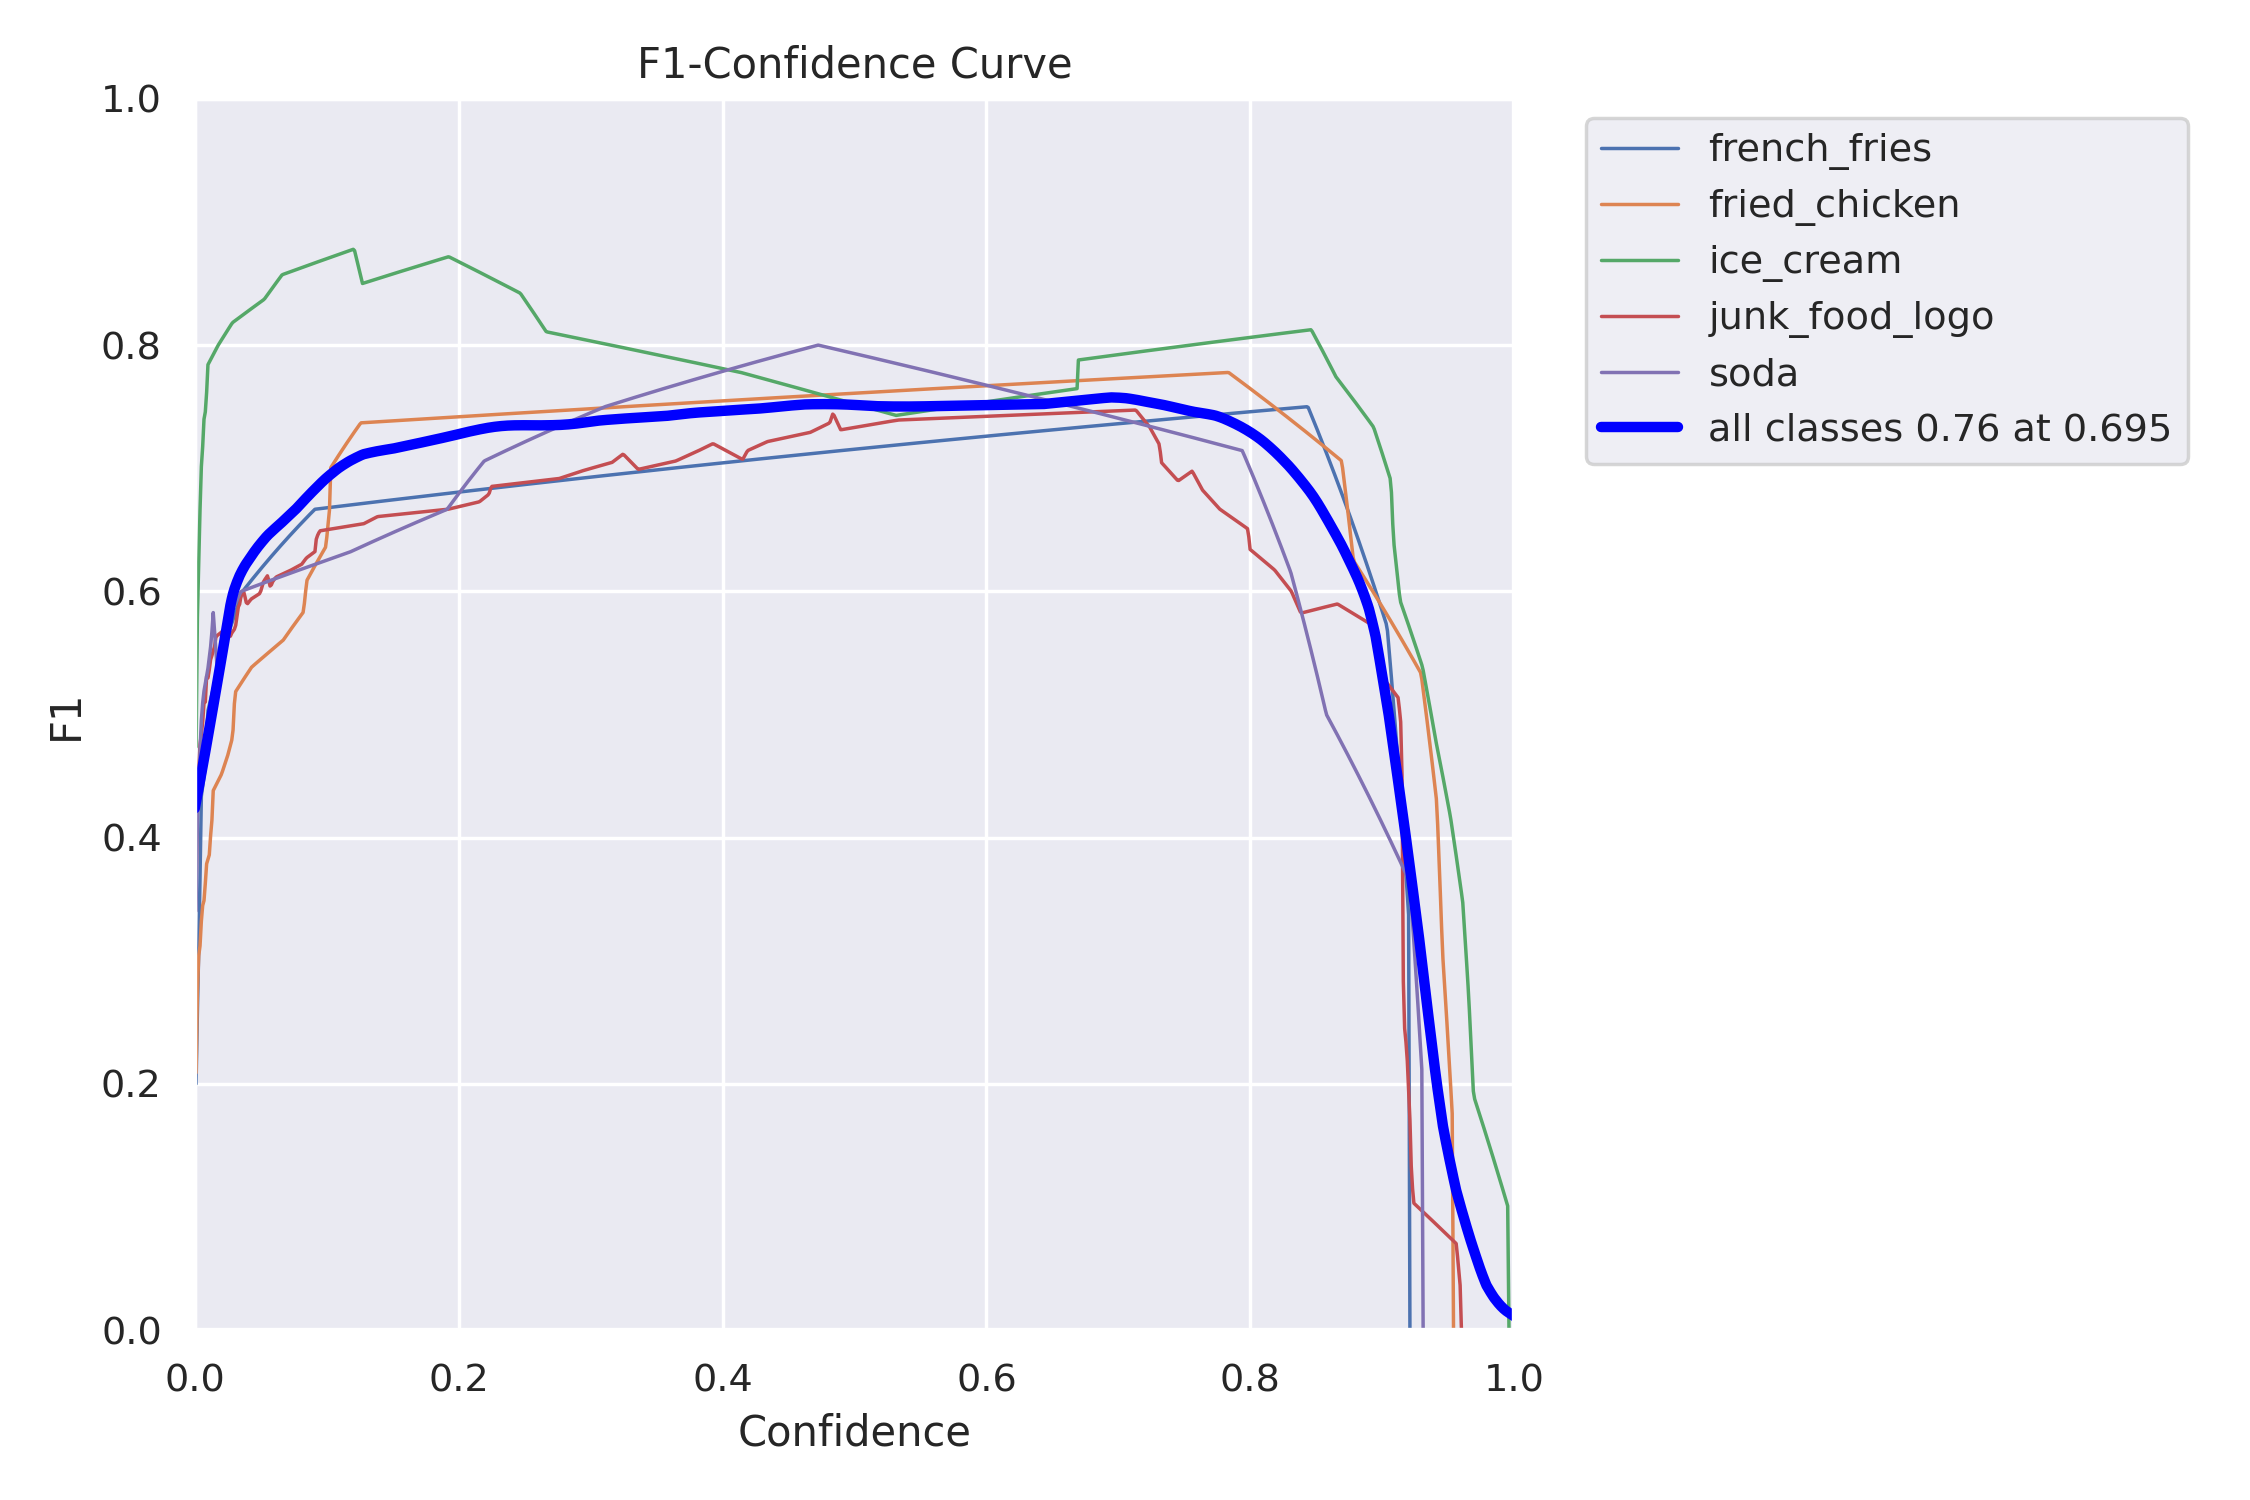

In [ ]:
Image(filename=f'{VALIDATION_PATH}F1_curve.png', width=600)

### Test set

In [ ]:
TEST_PATH = f'{RESULTS_PATH}/test75/'

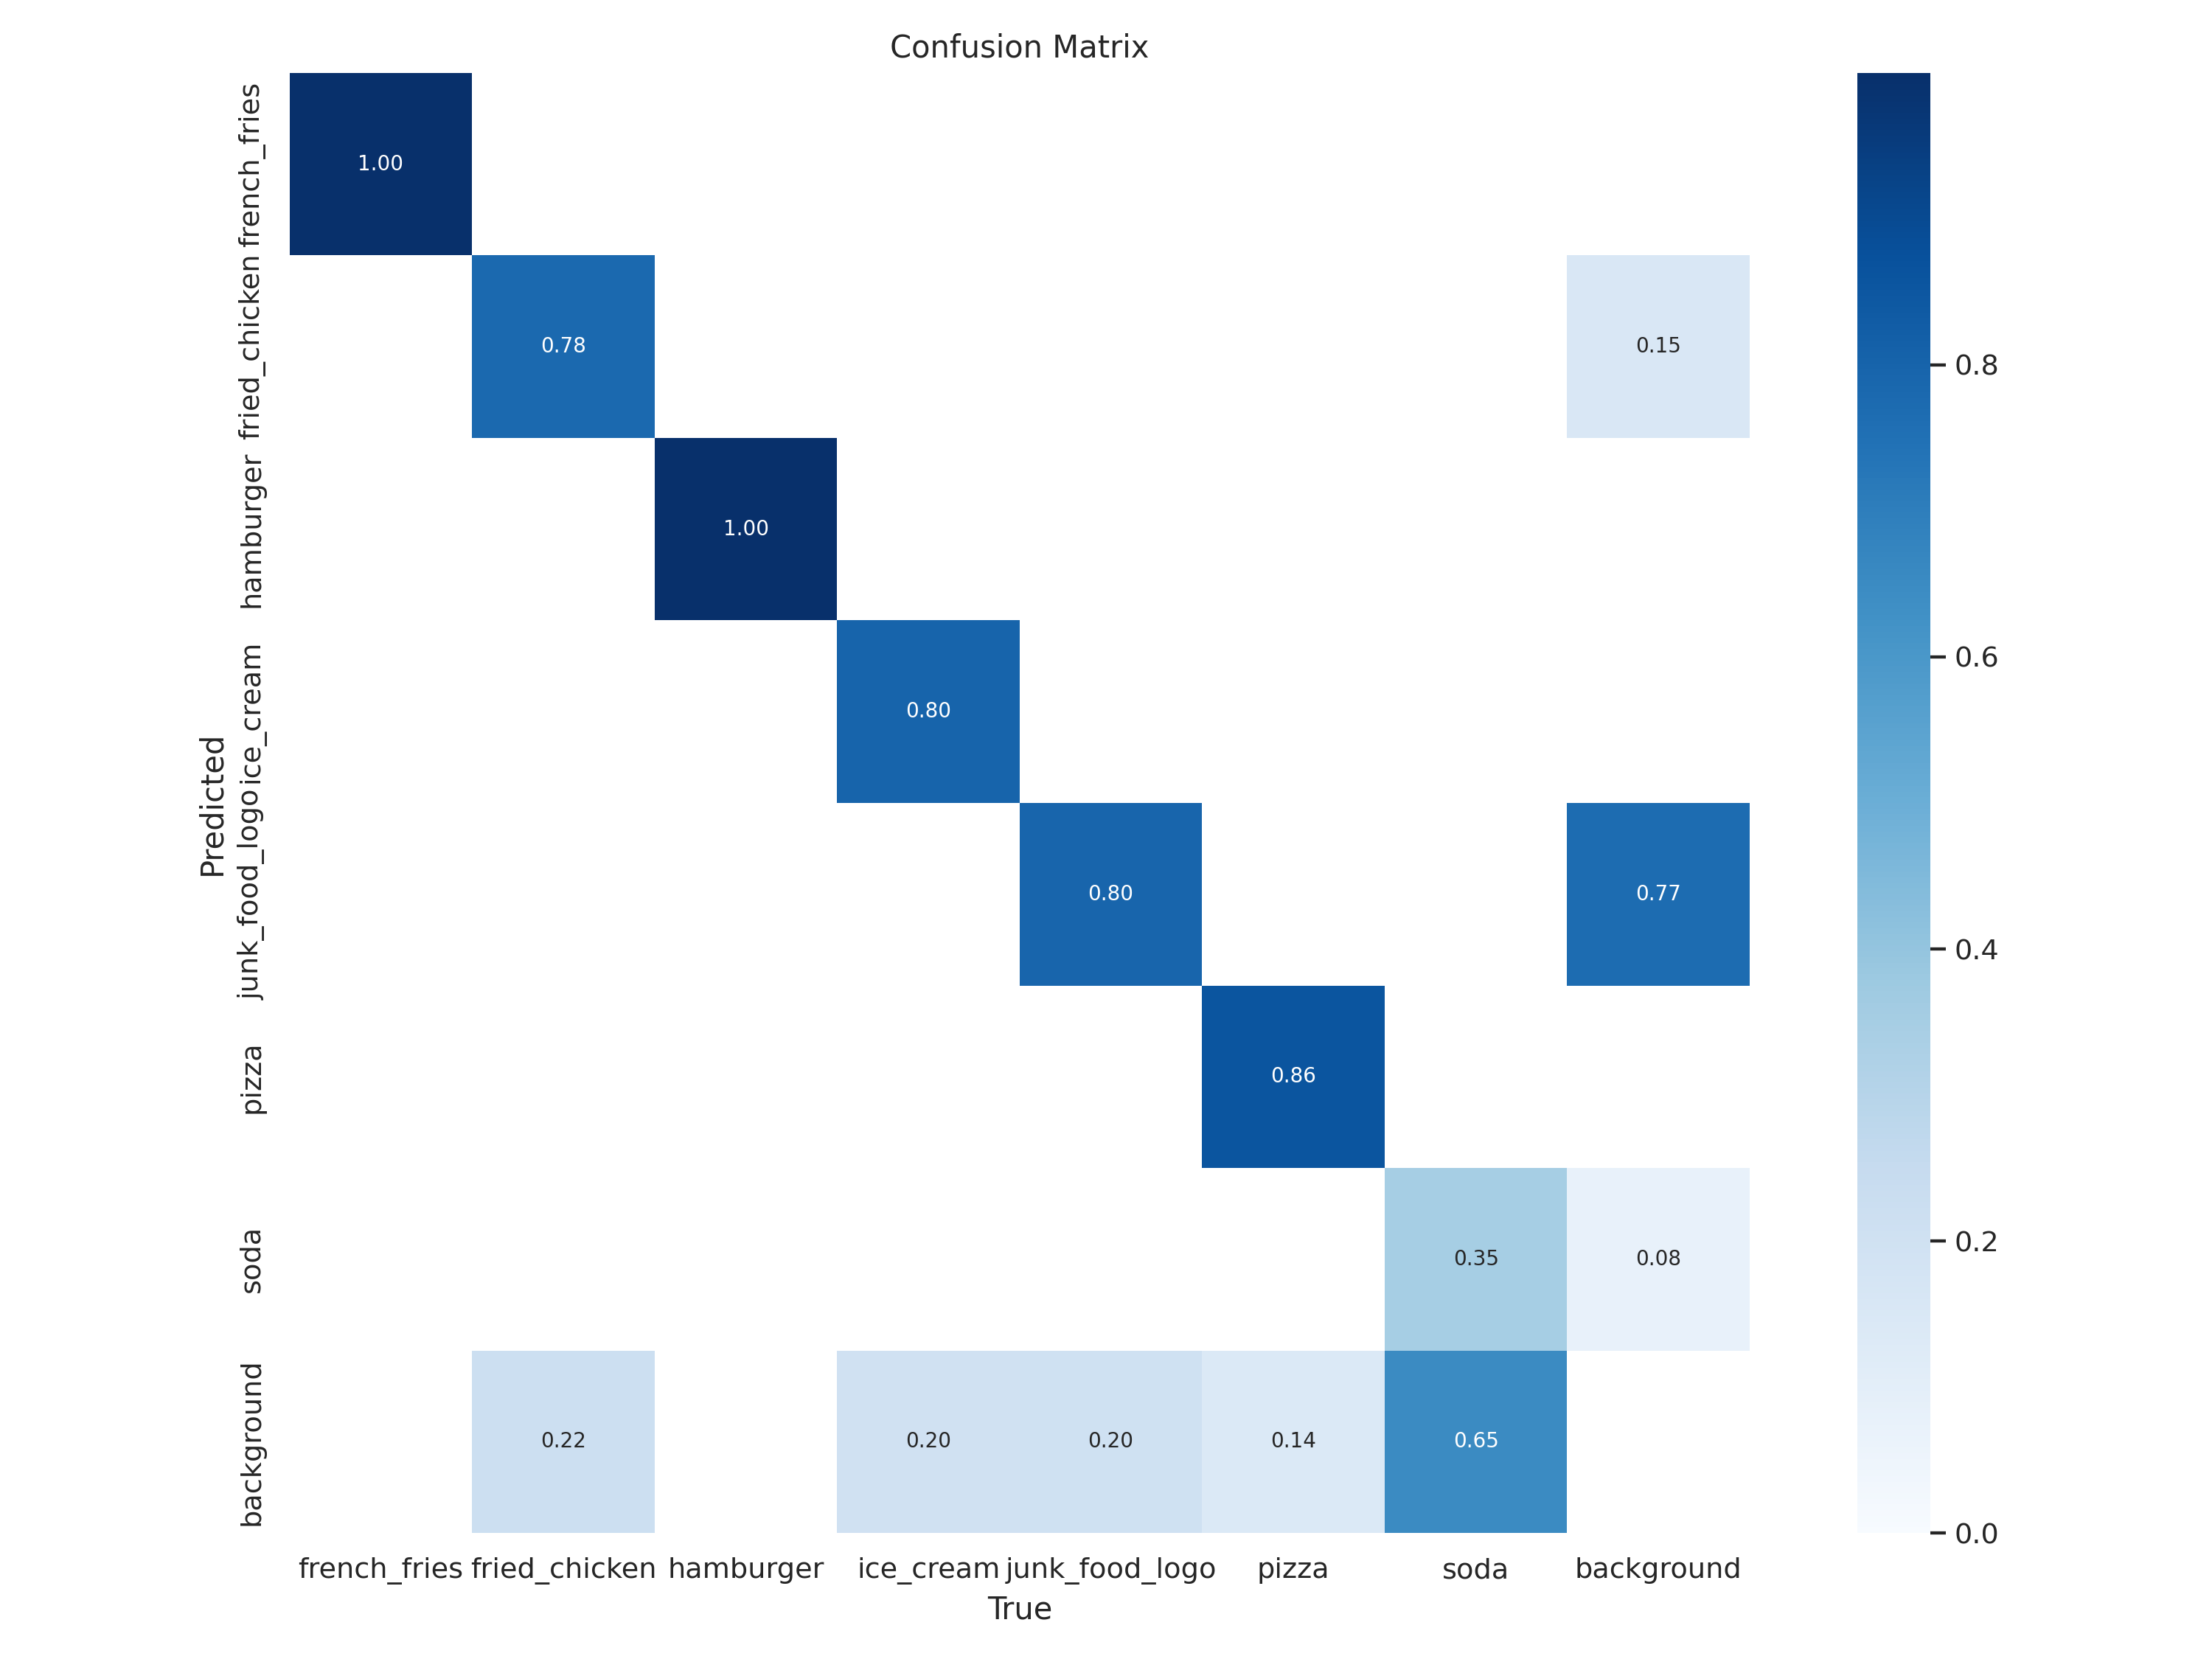

In [ ]:
Image(filename=f'{TEST_PATH}confusion_matrix.png', width=600)

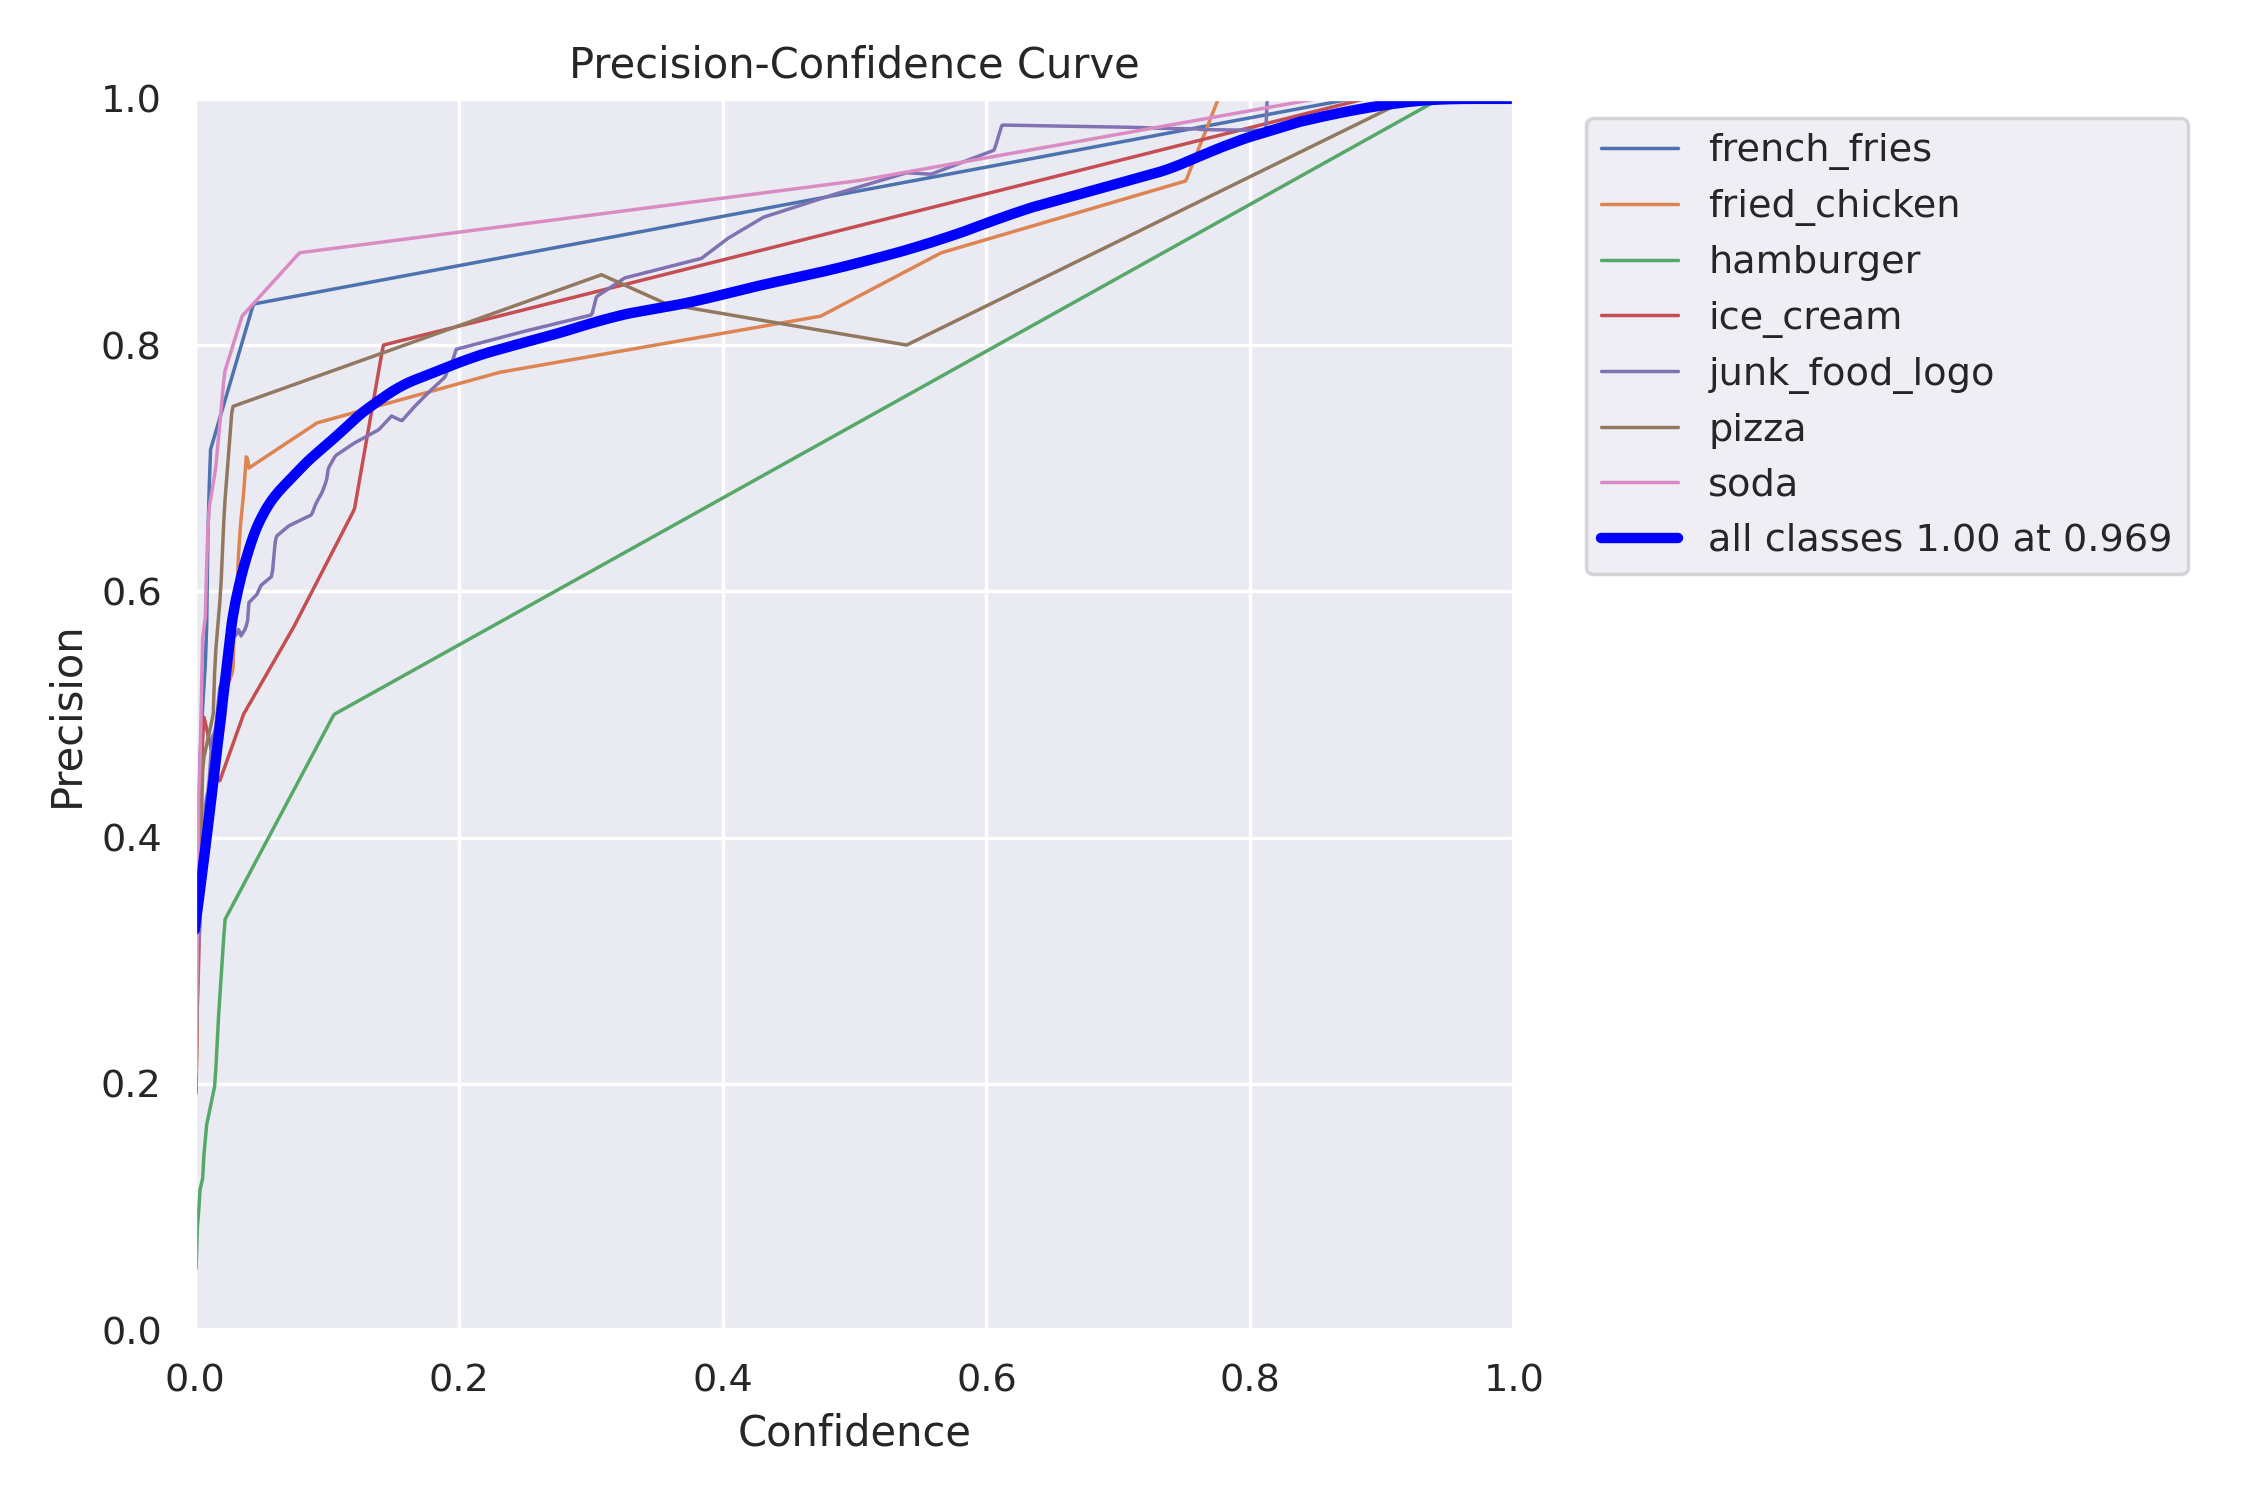

In [ ]:
Image(filename=f'{TEST_PATH}P_curve.png', width=600)

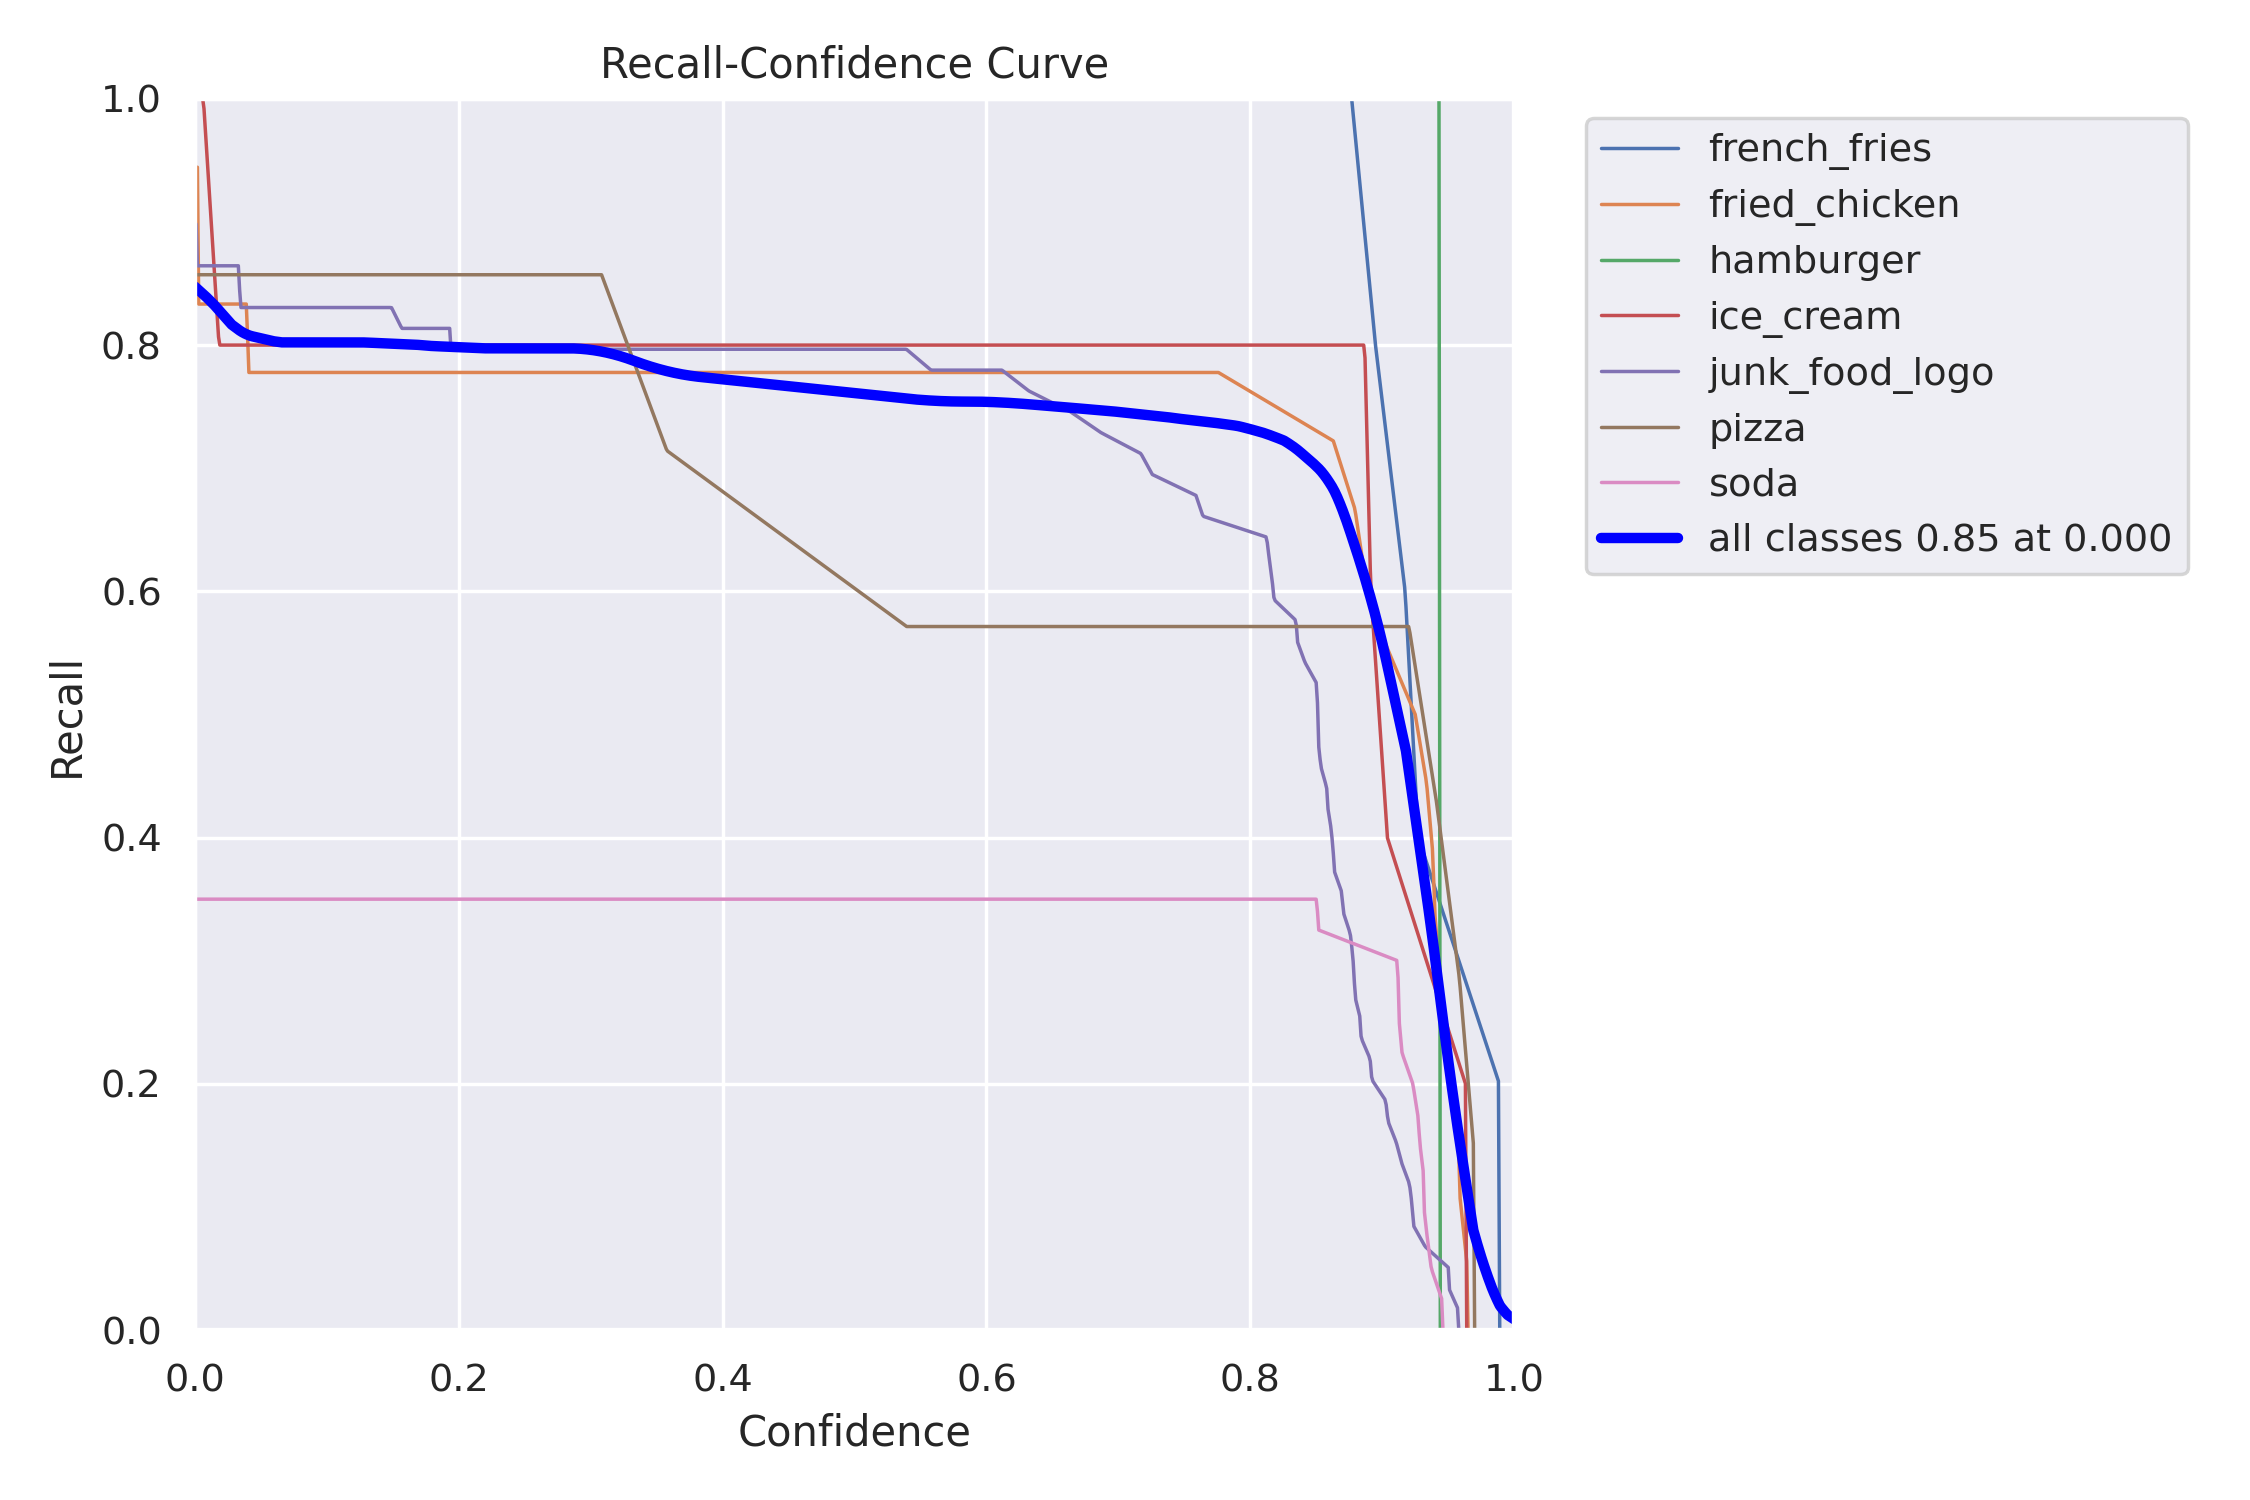

In [ ]:
Image(filename=f'{TEST_PATH}R_curve.png', width=600)

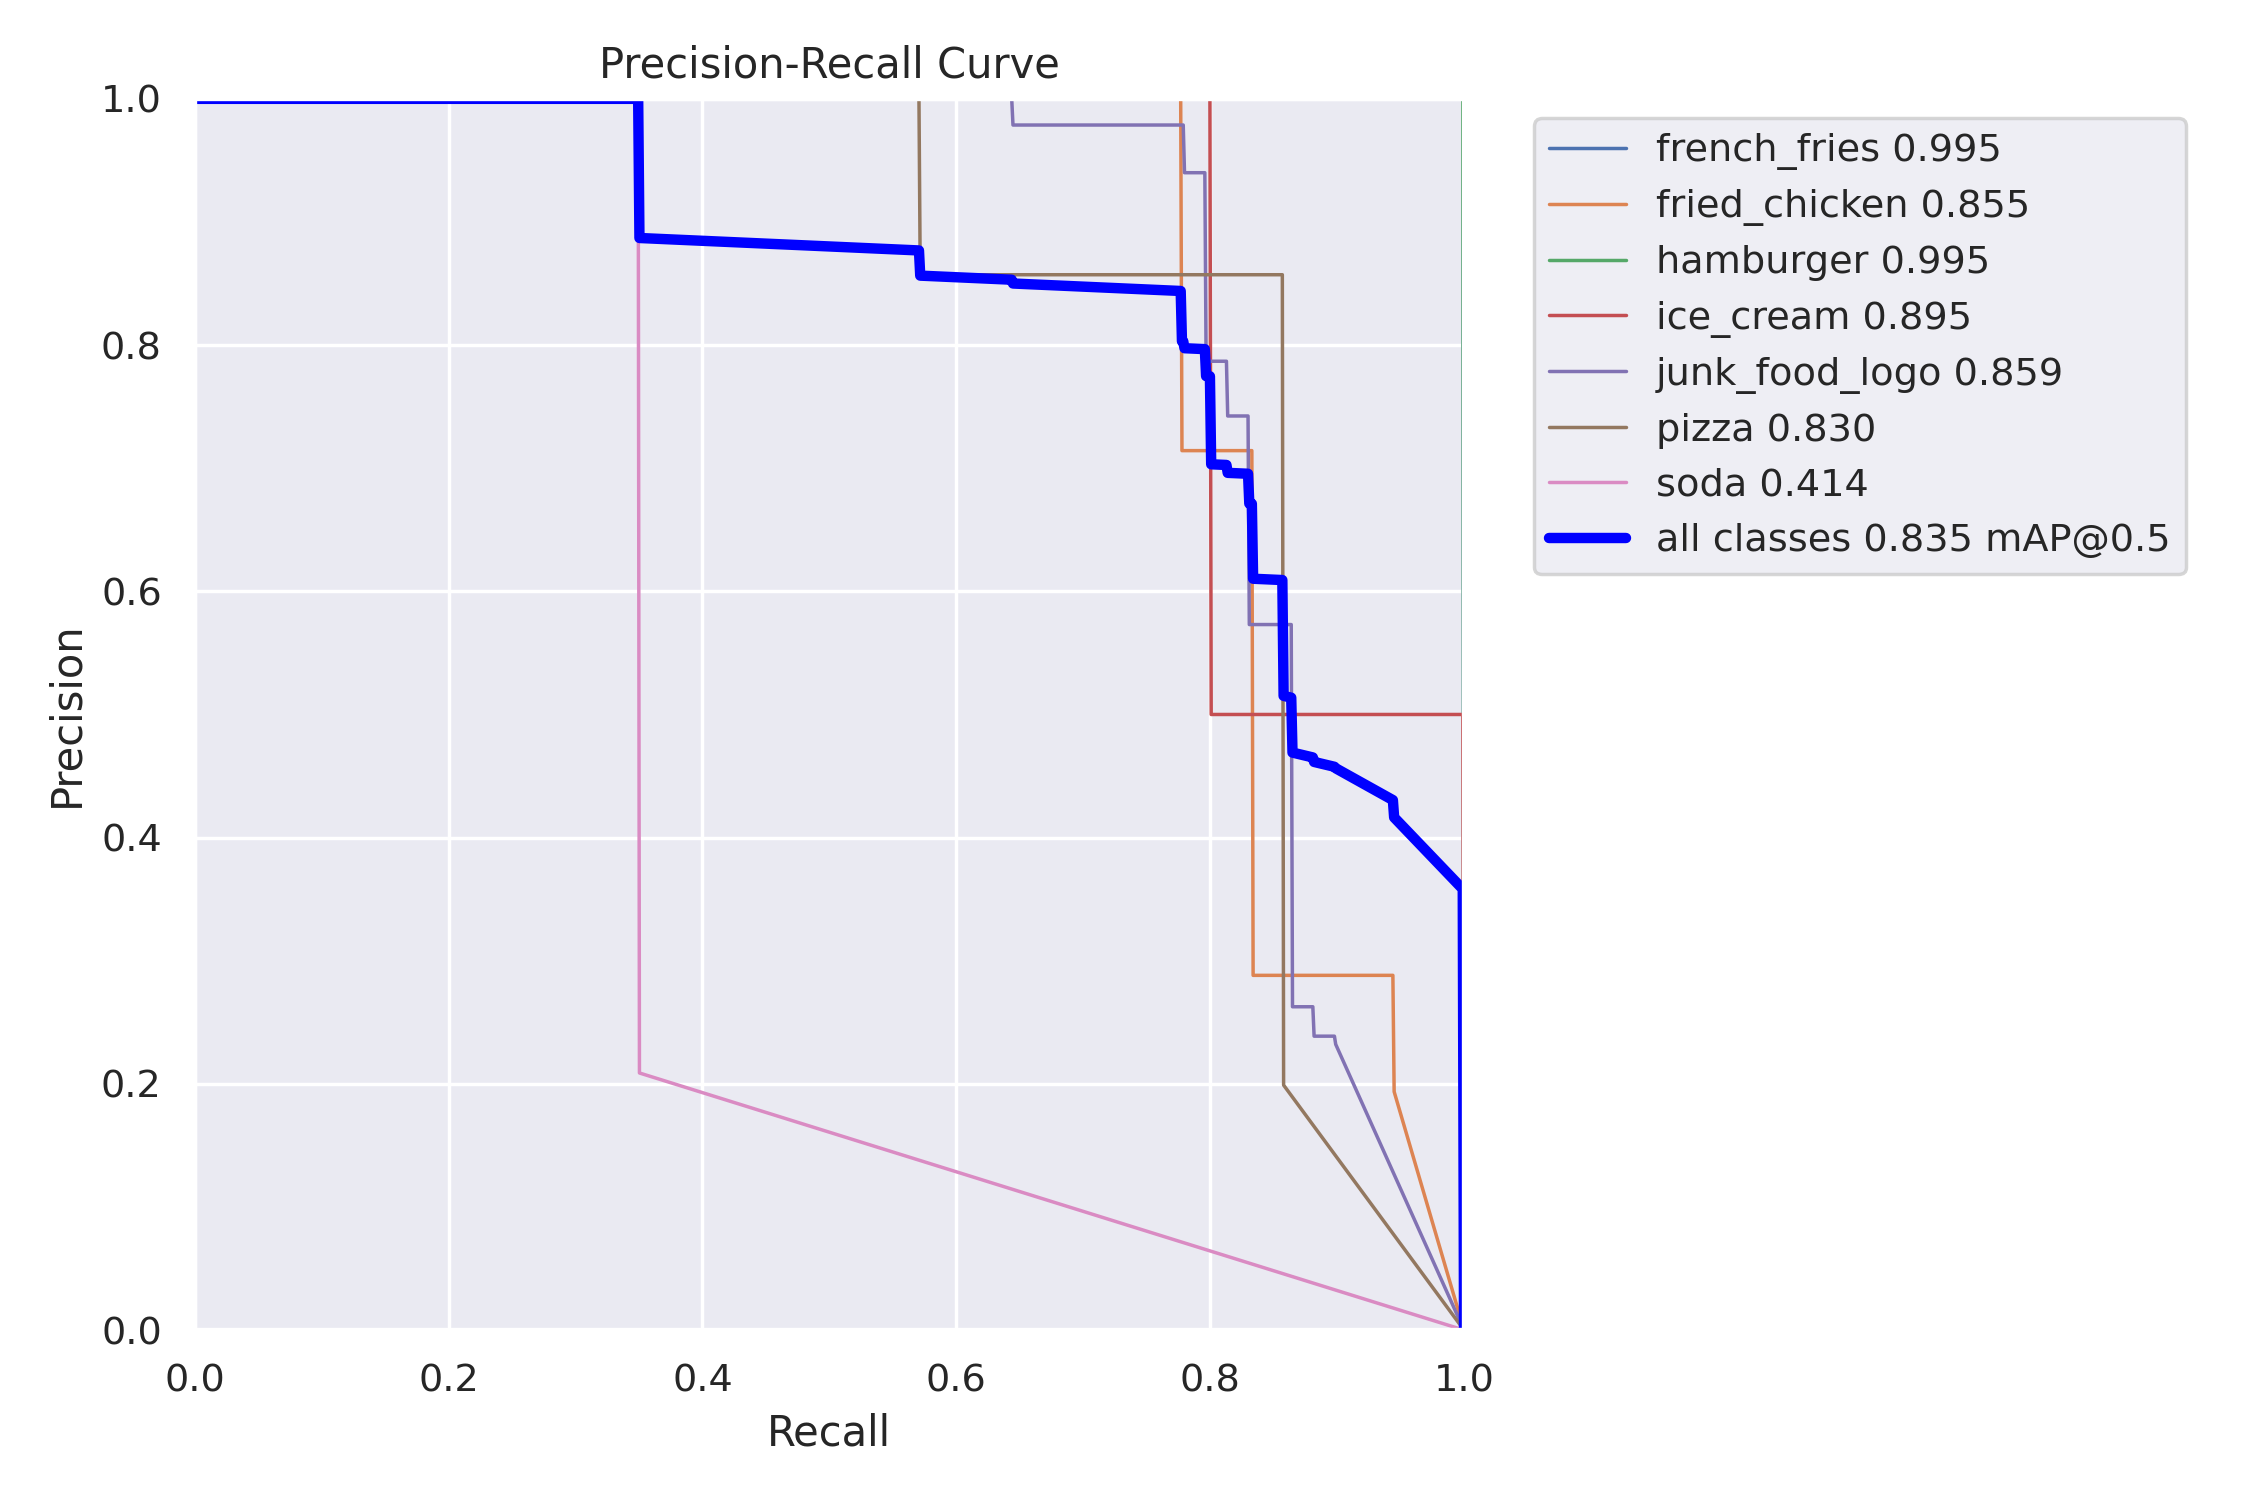

In [ ]:
Image(filename=f'{TEST_PATH}PR_curve.png', width=600)

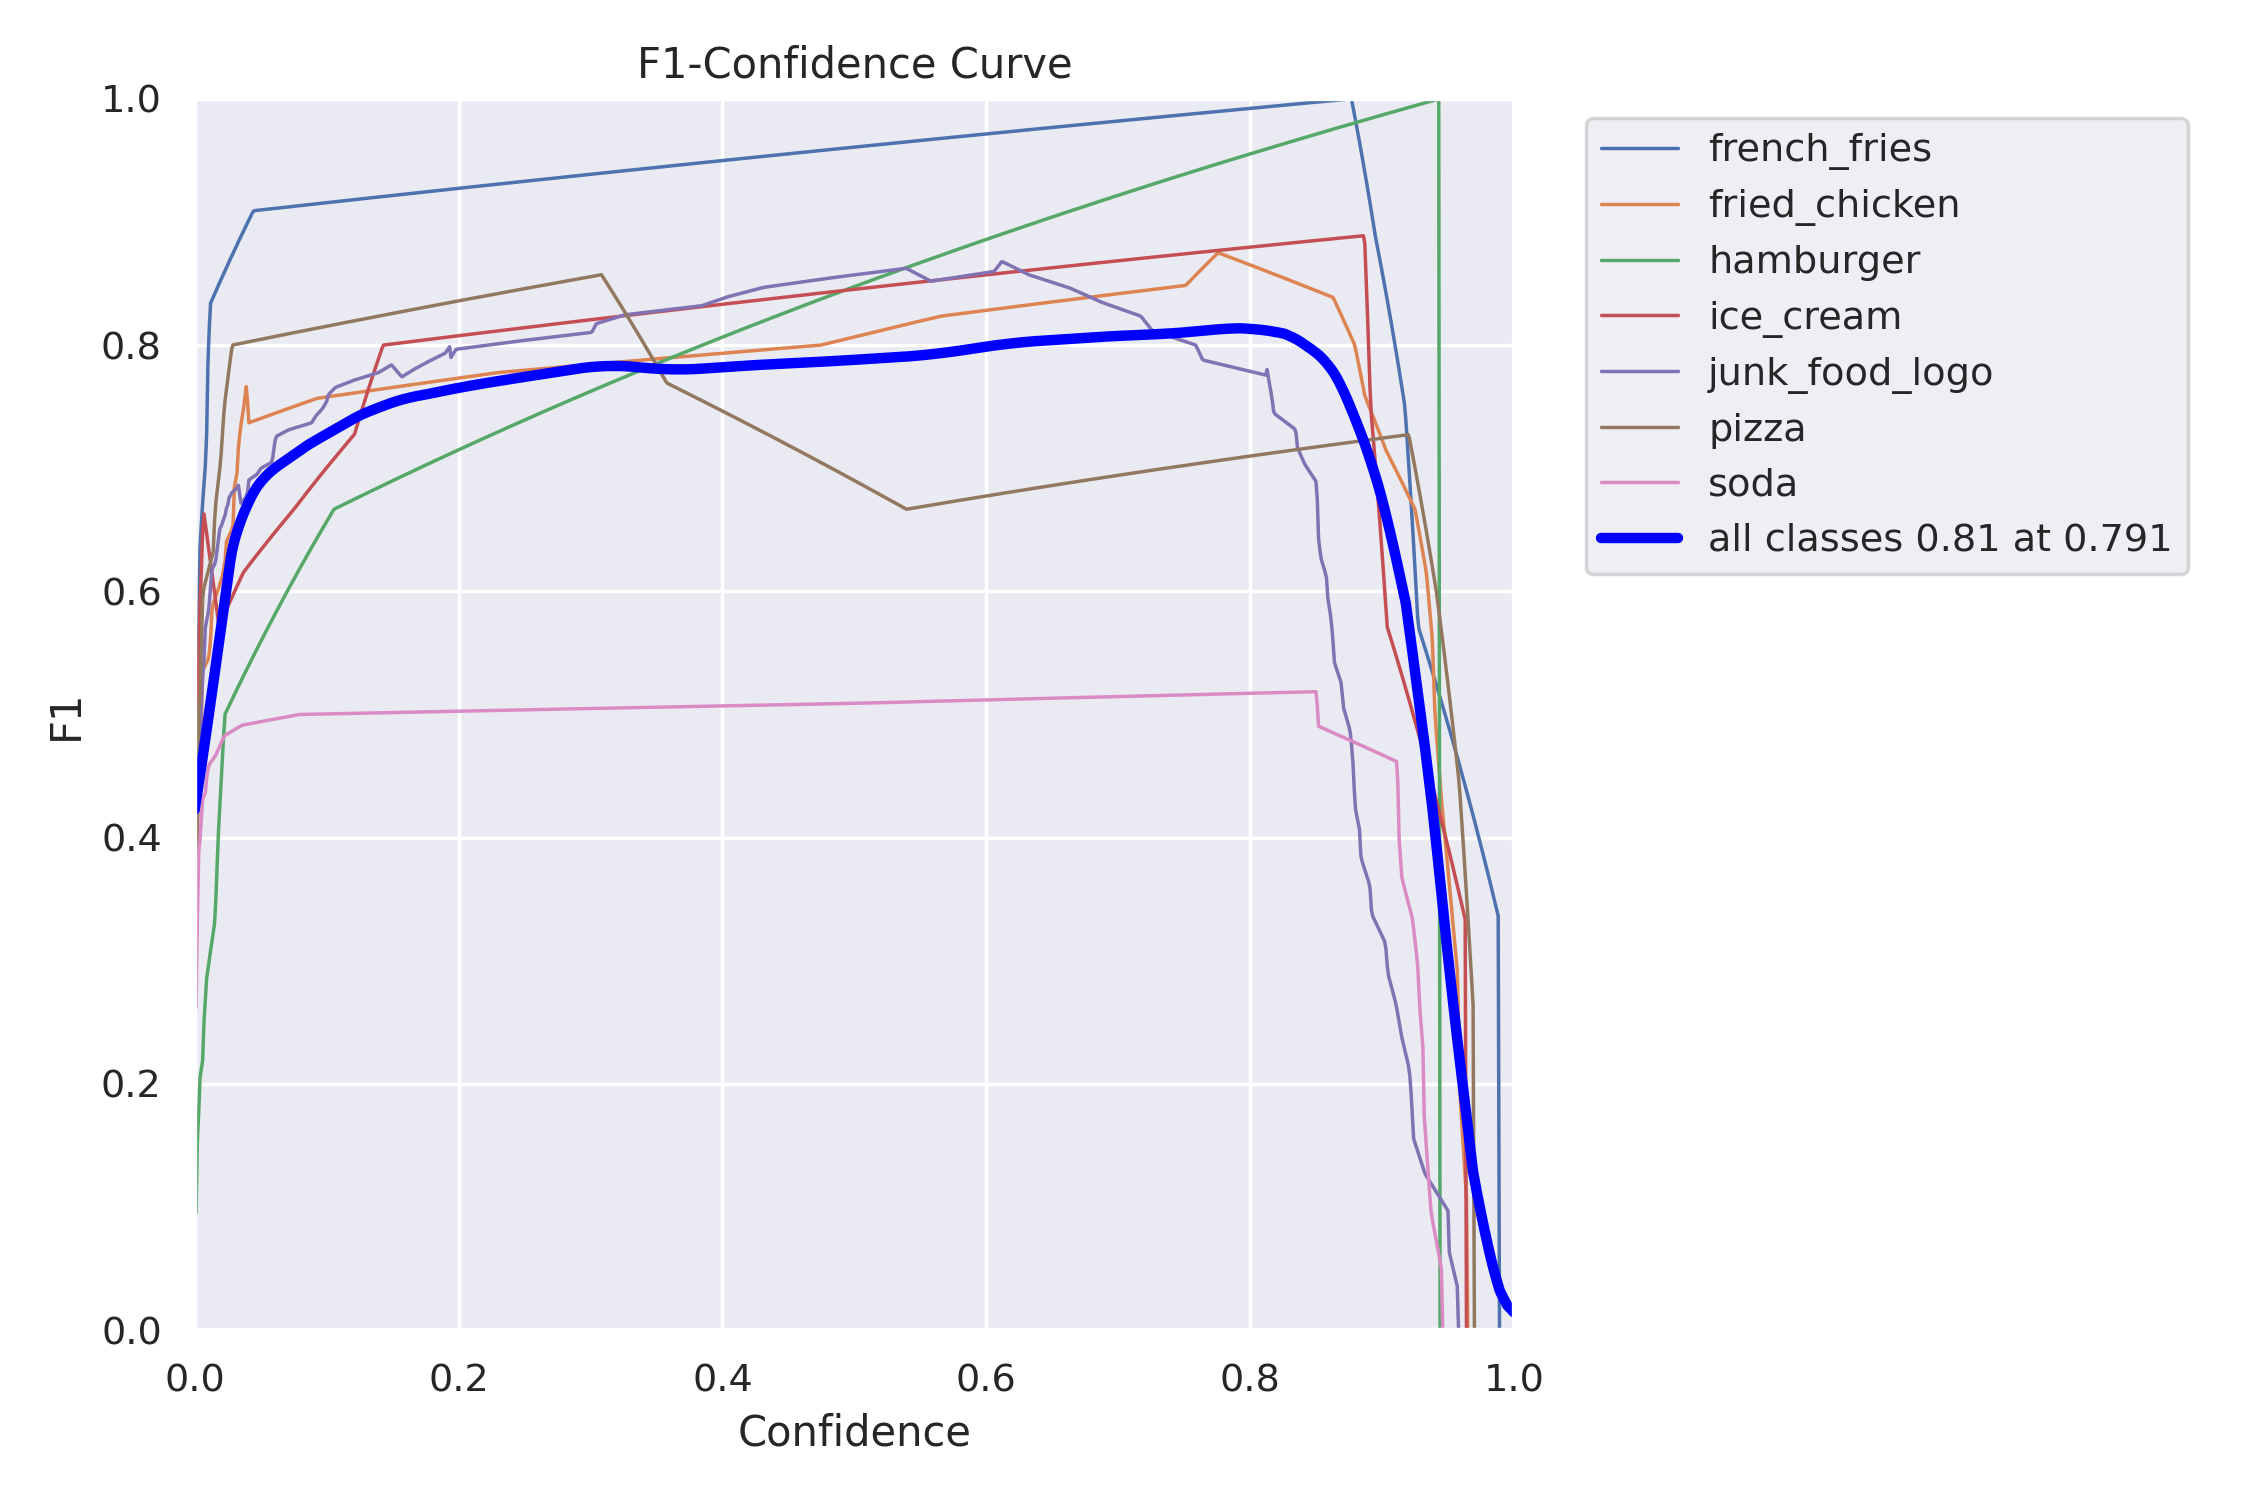

In [ ]:
Image(filename=f'{TEST_PATH}F1_curve.png', width=600)

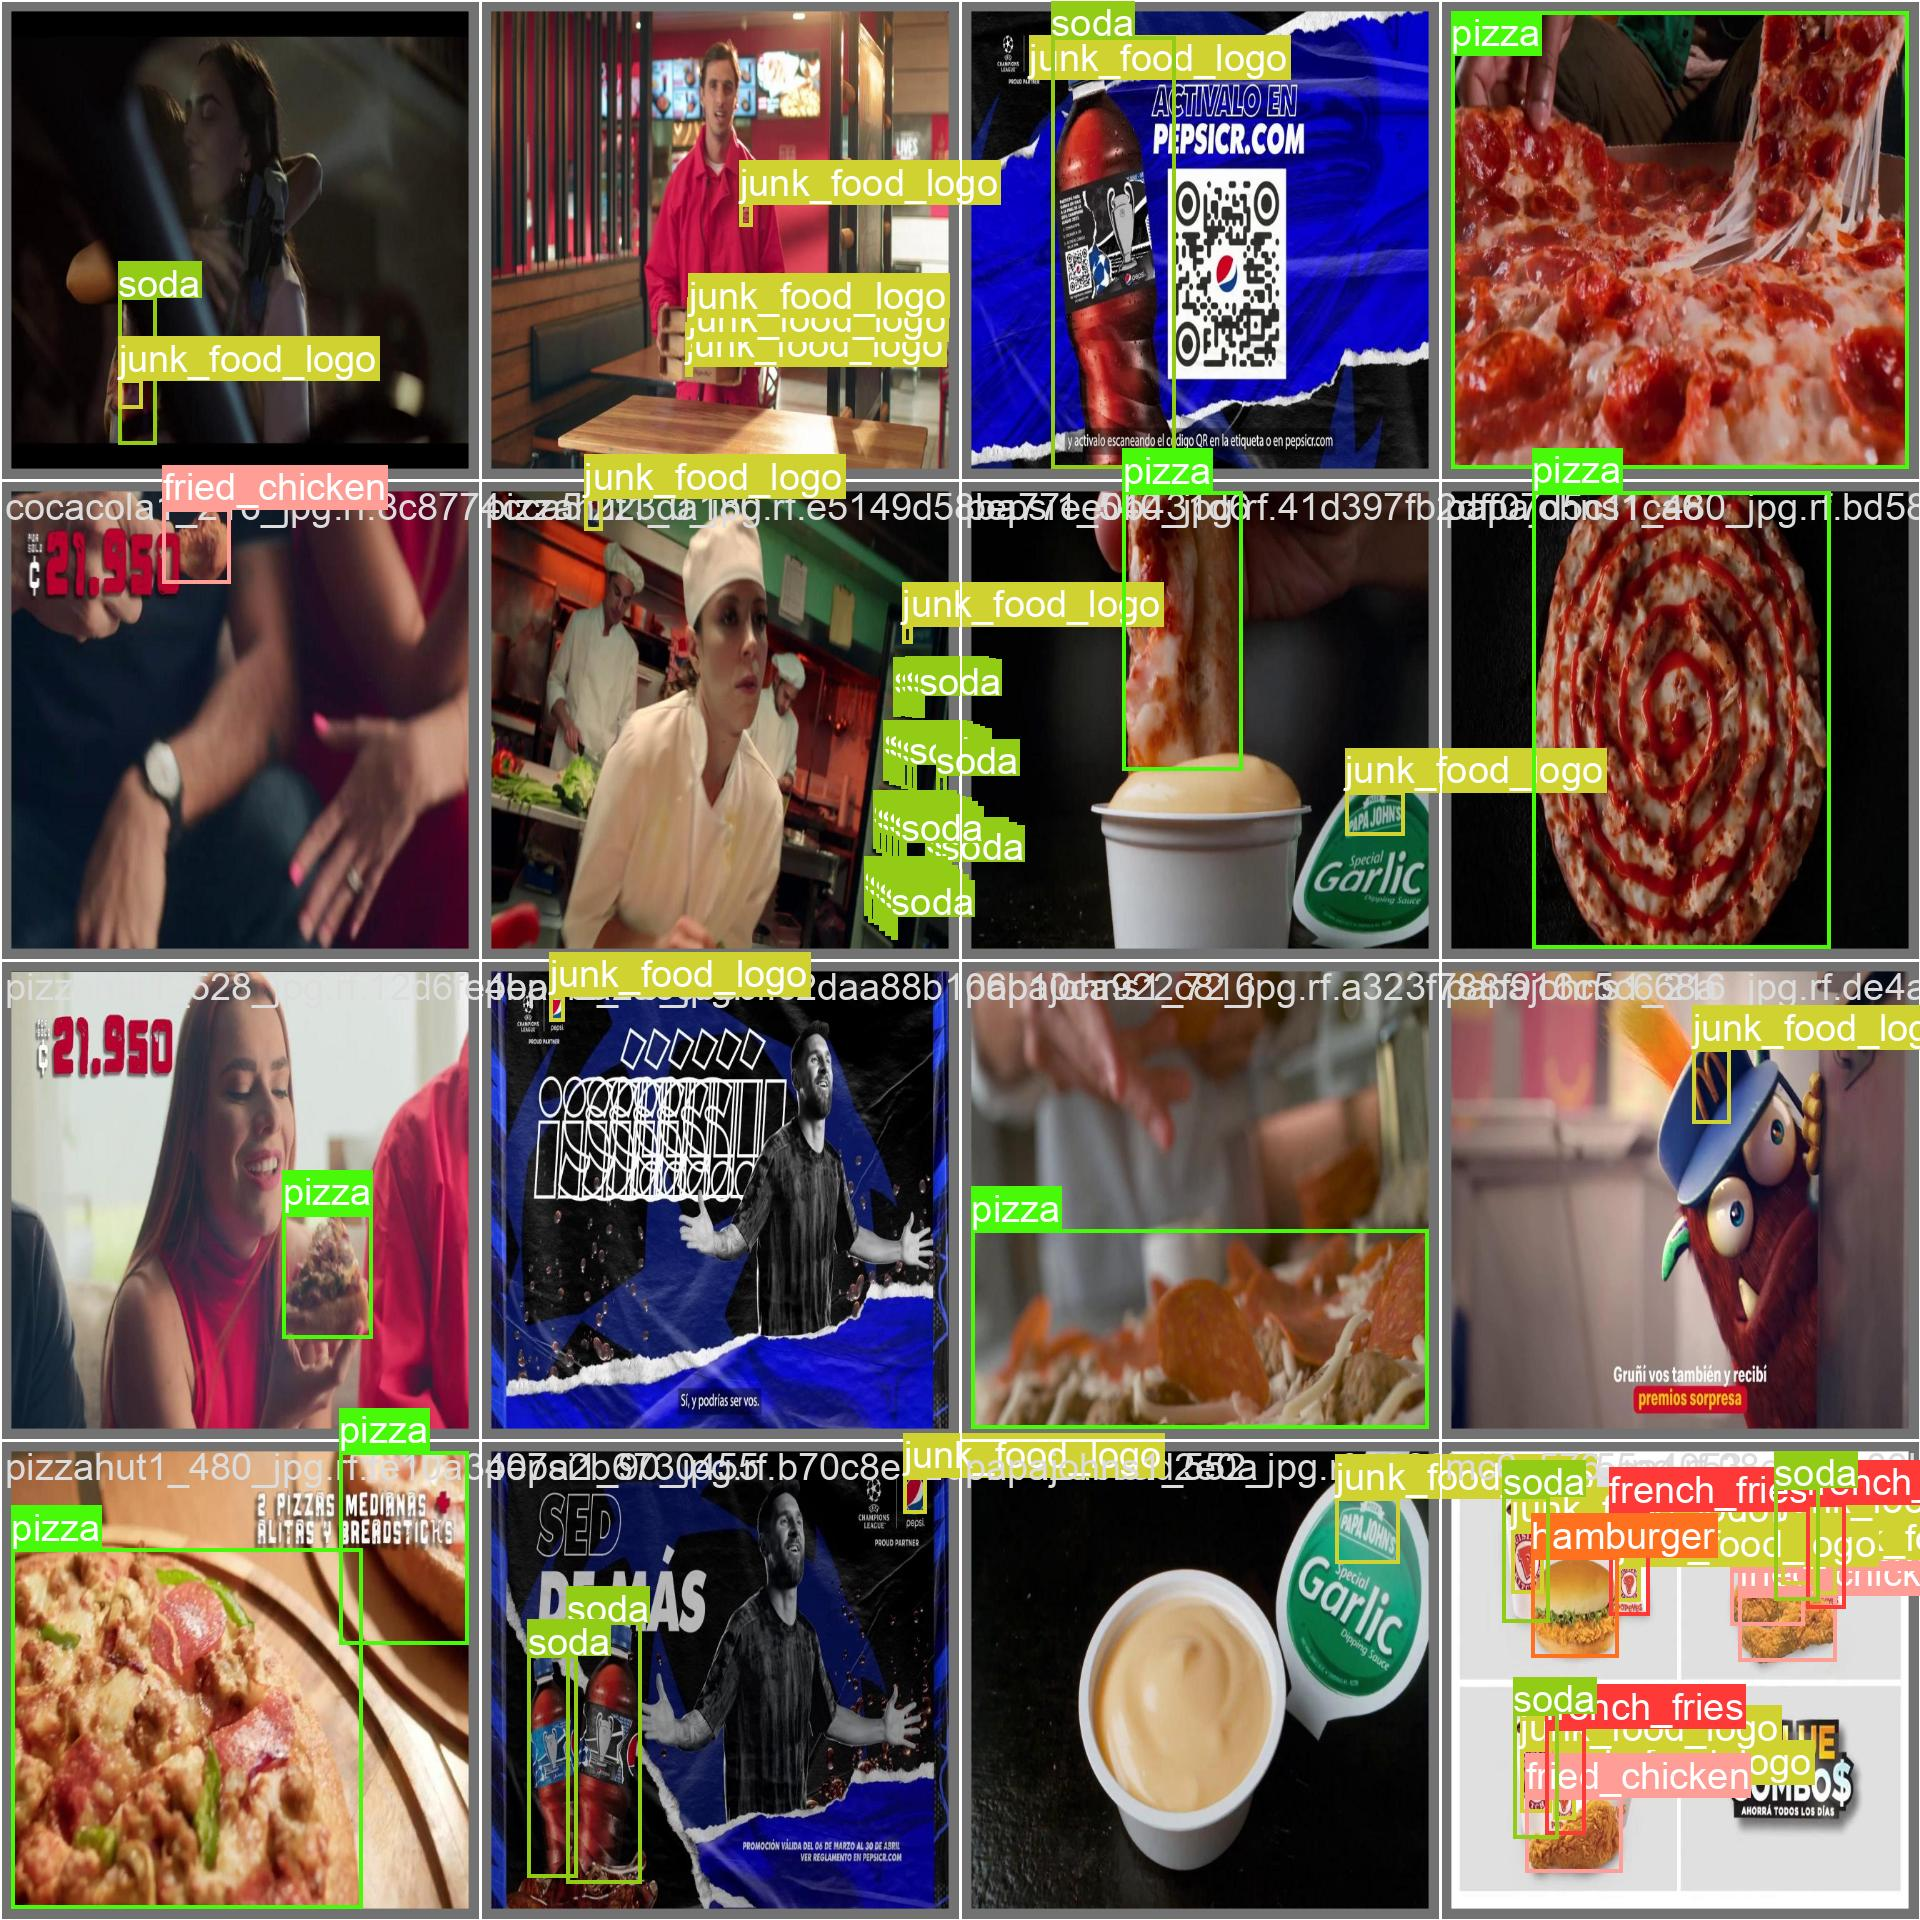

In [ ]:
Image(filename=f'{TEST_PATH}val_batch0_labels.jpg', width=600)

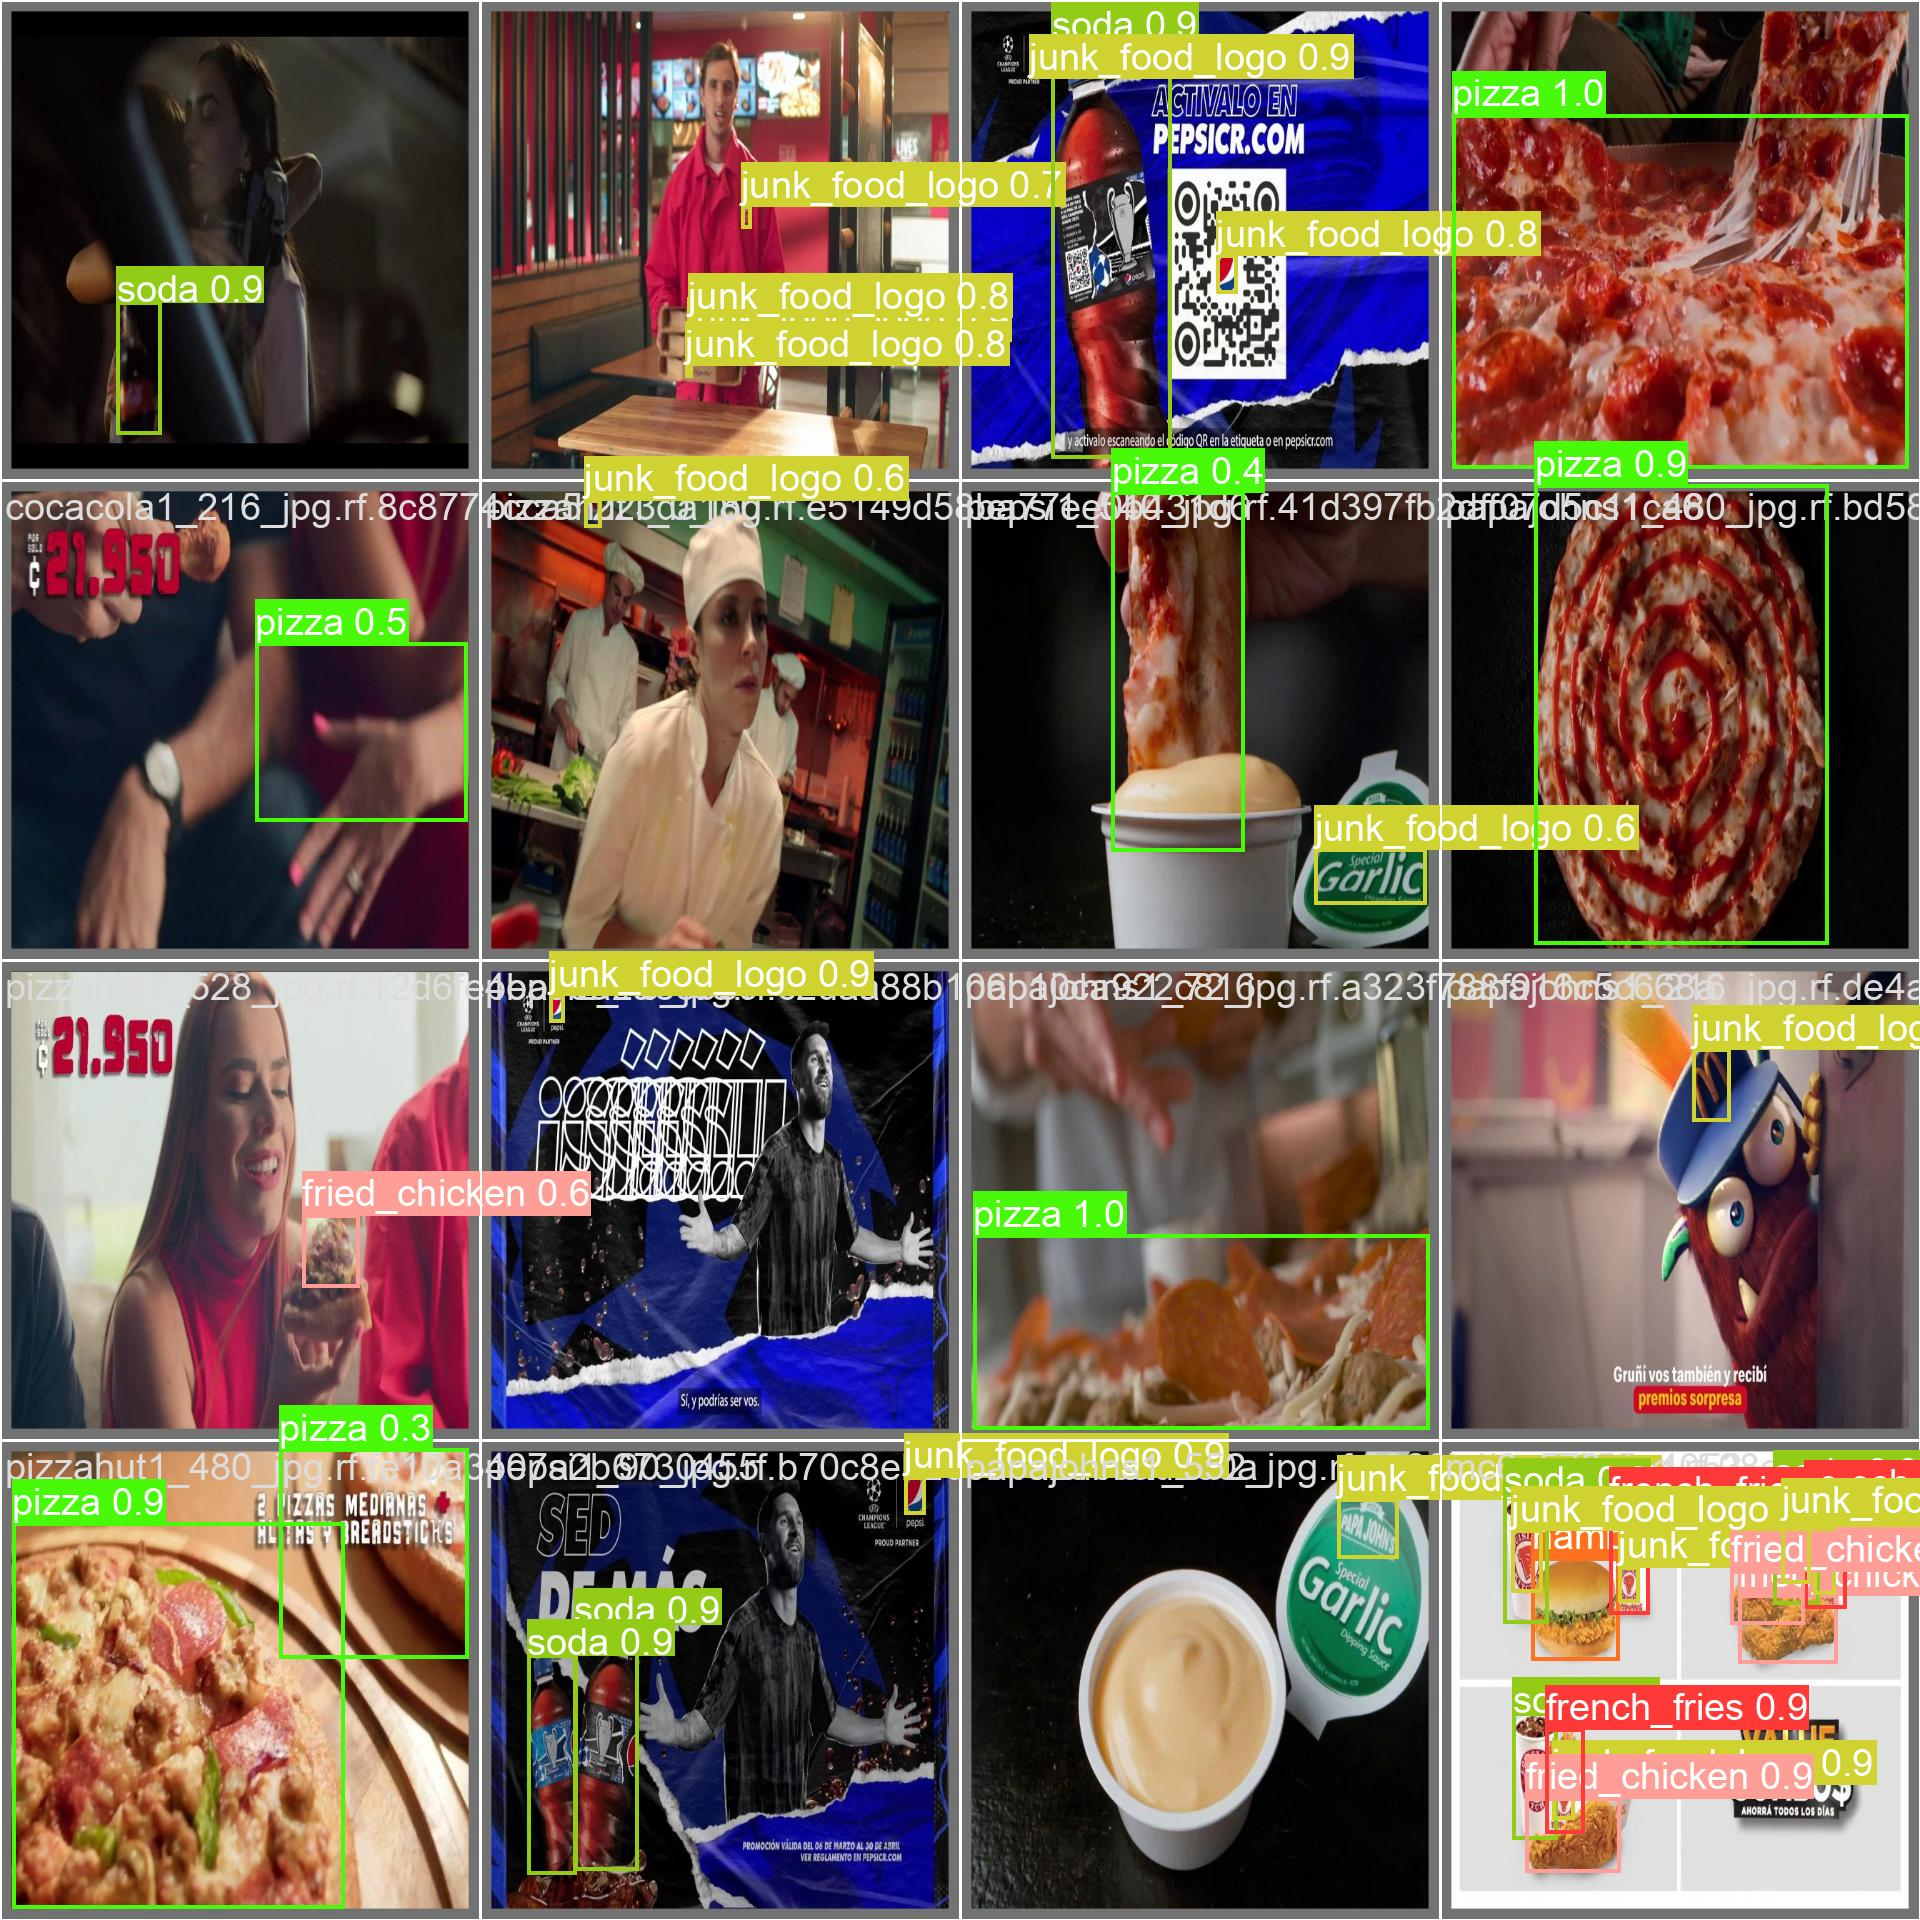

In [ ]:
Image(filename=f'{TEST_PATH}val_batch0_pred.jpg', width=600)

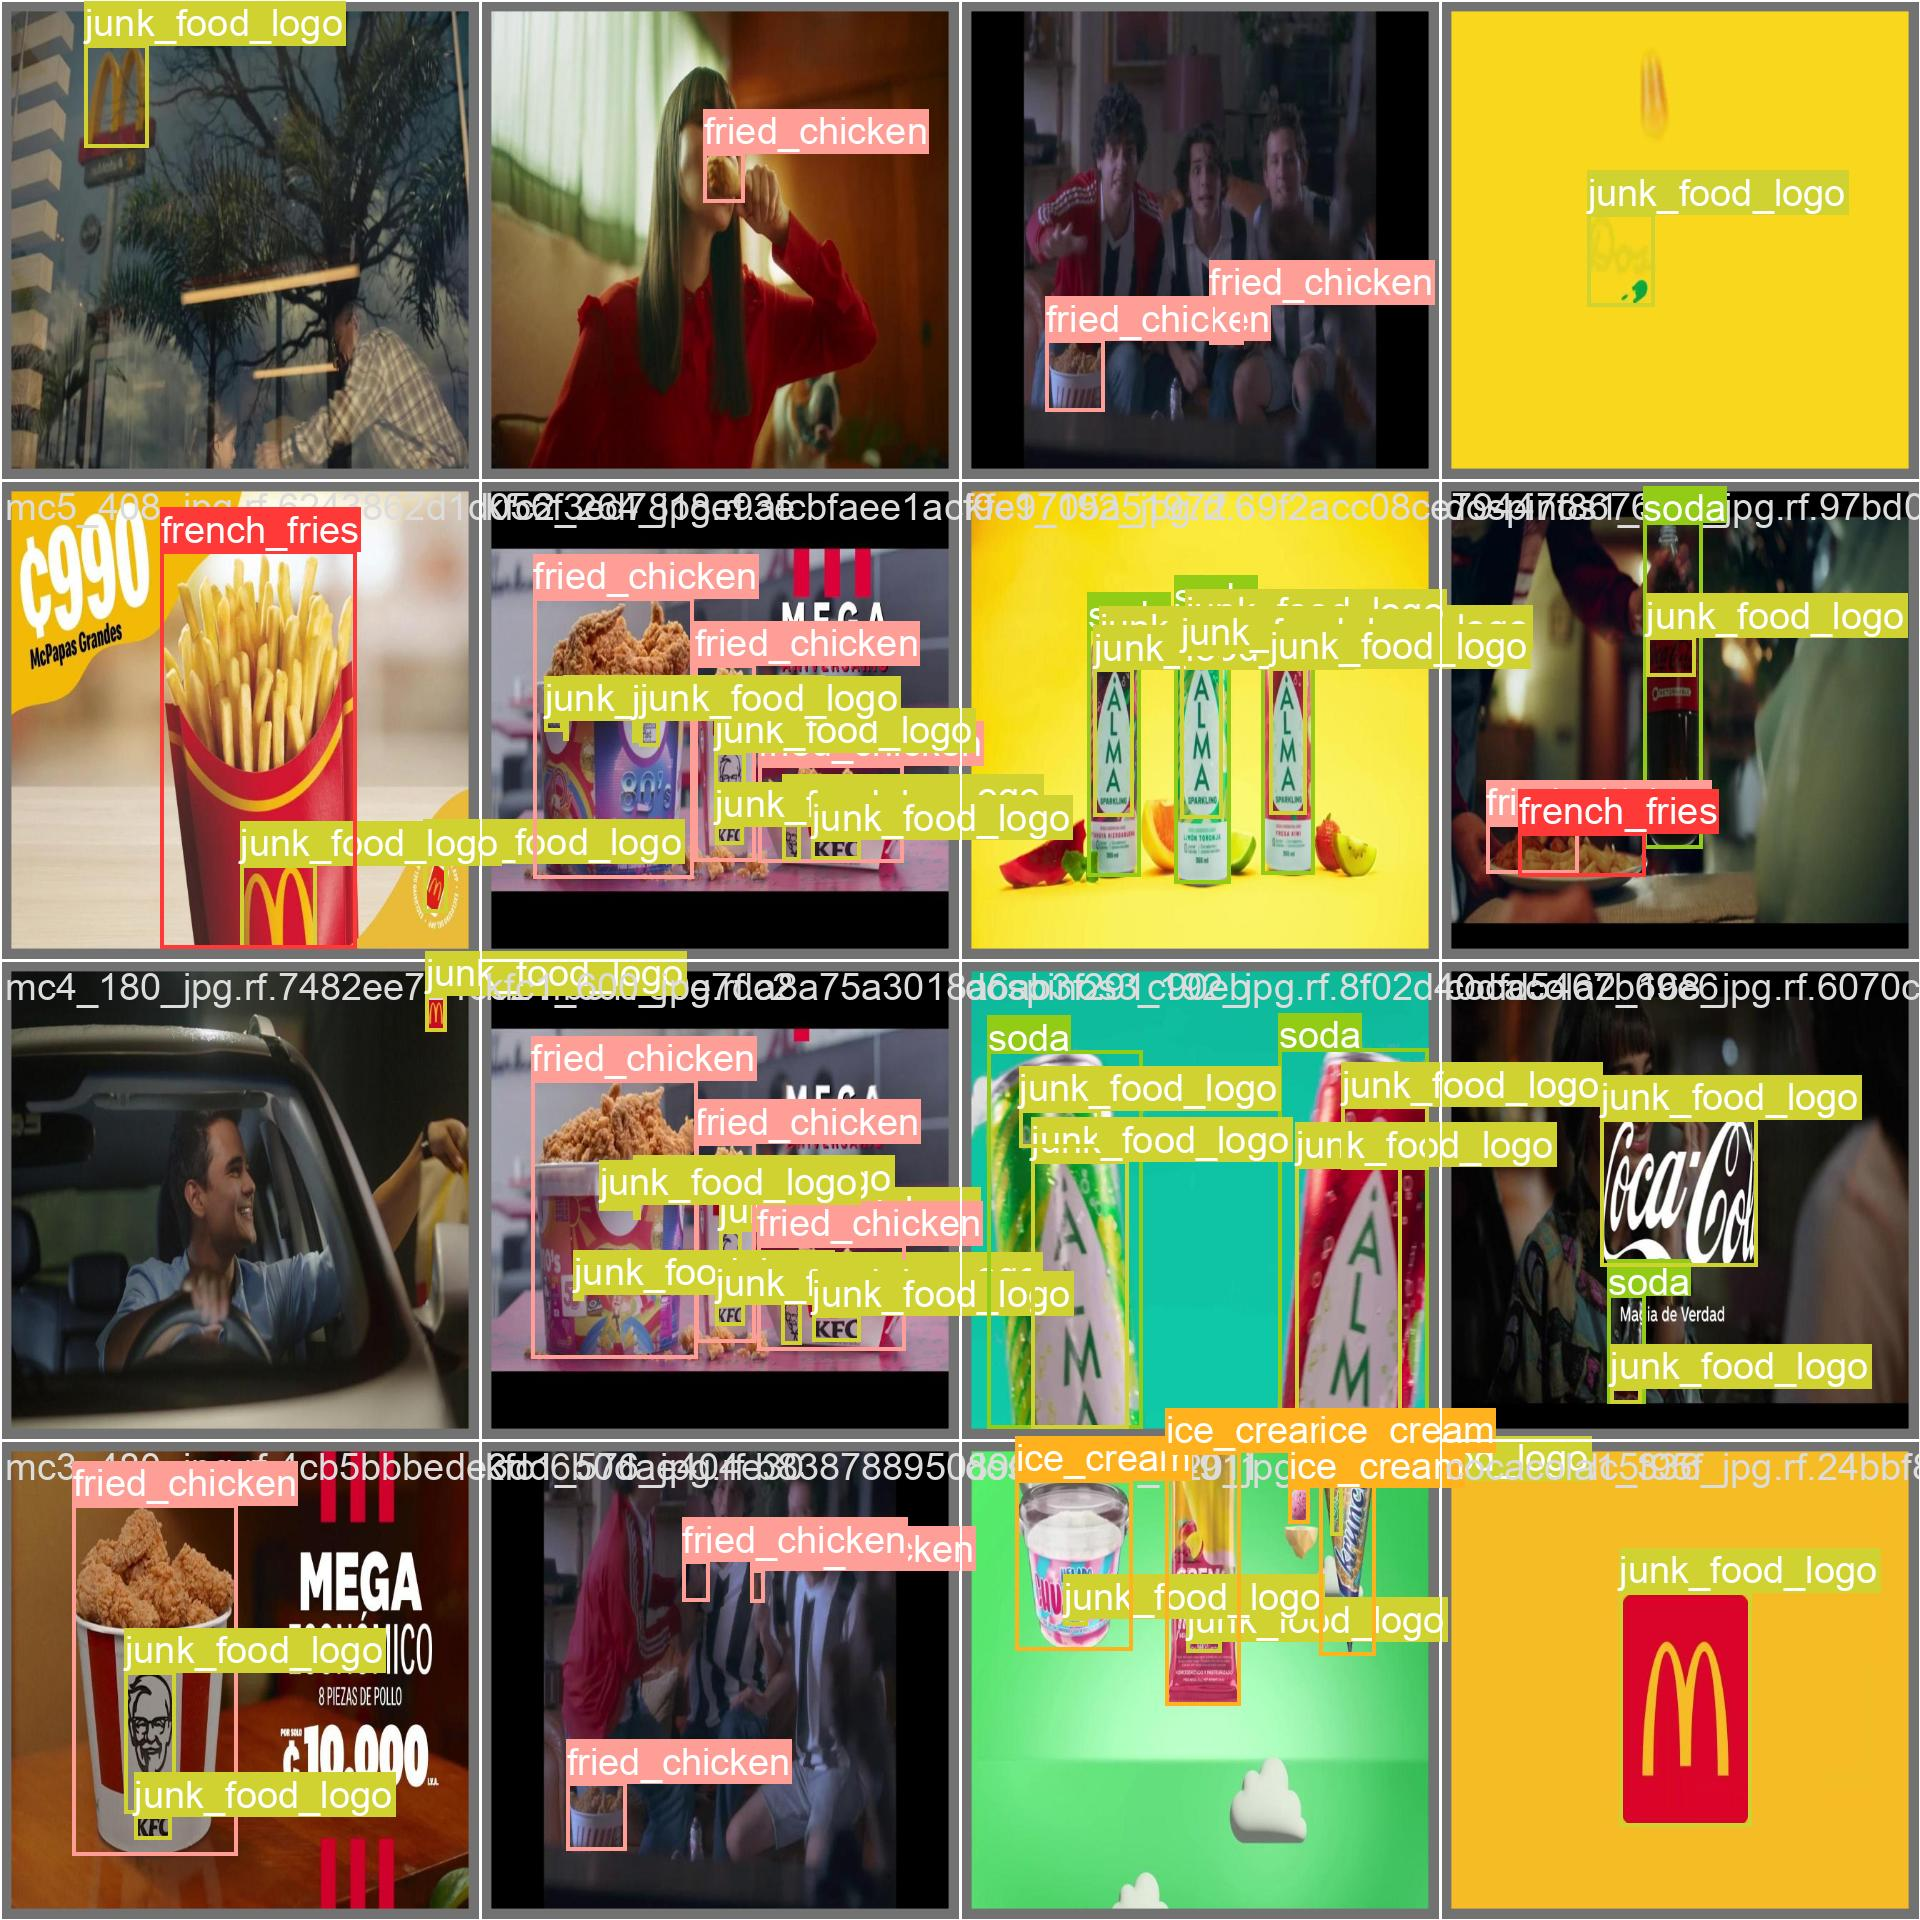

In [ ]:
Image(filename=f'{TEST_PATH}val_batch1_labels.jpg', width=600)

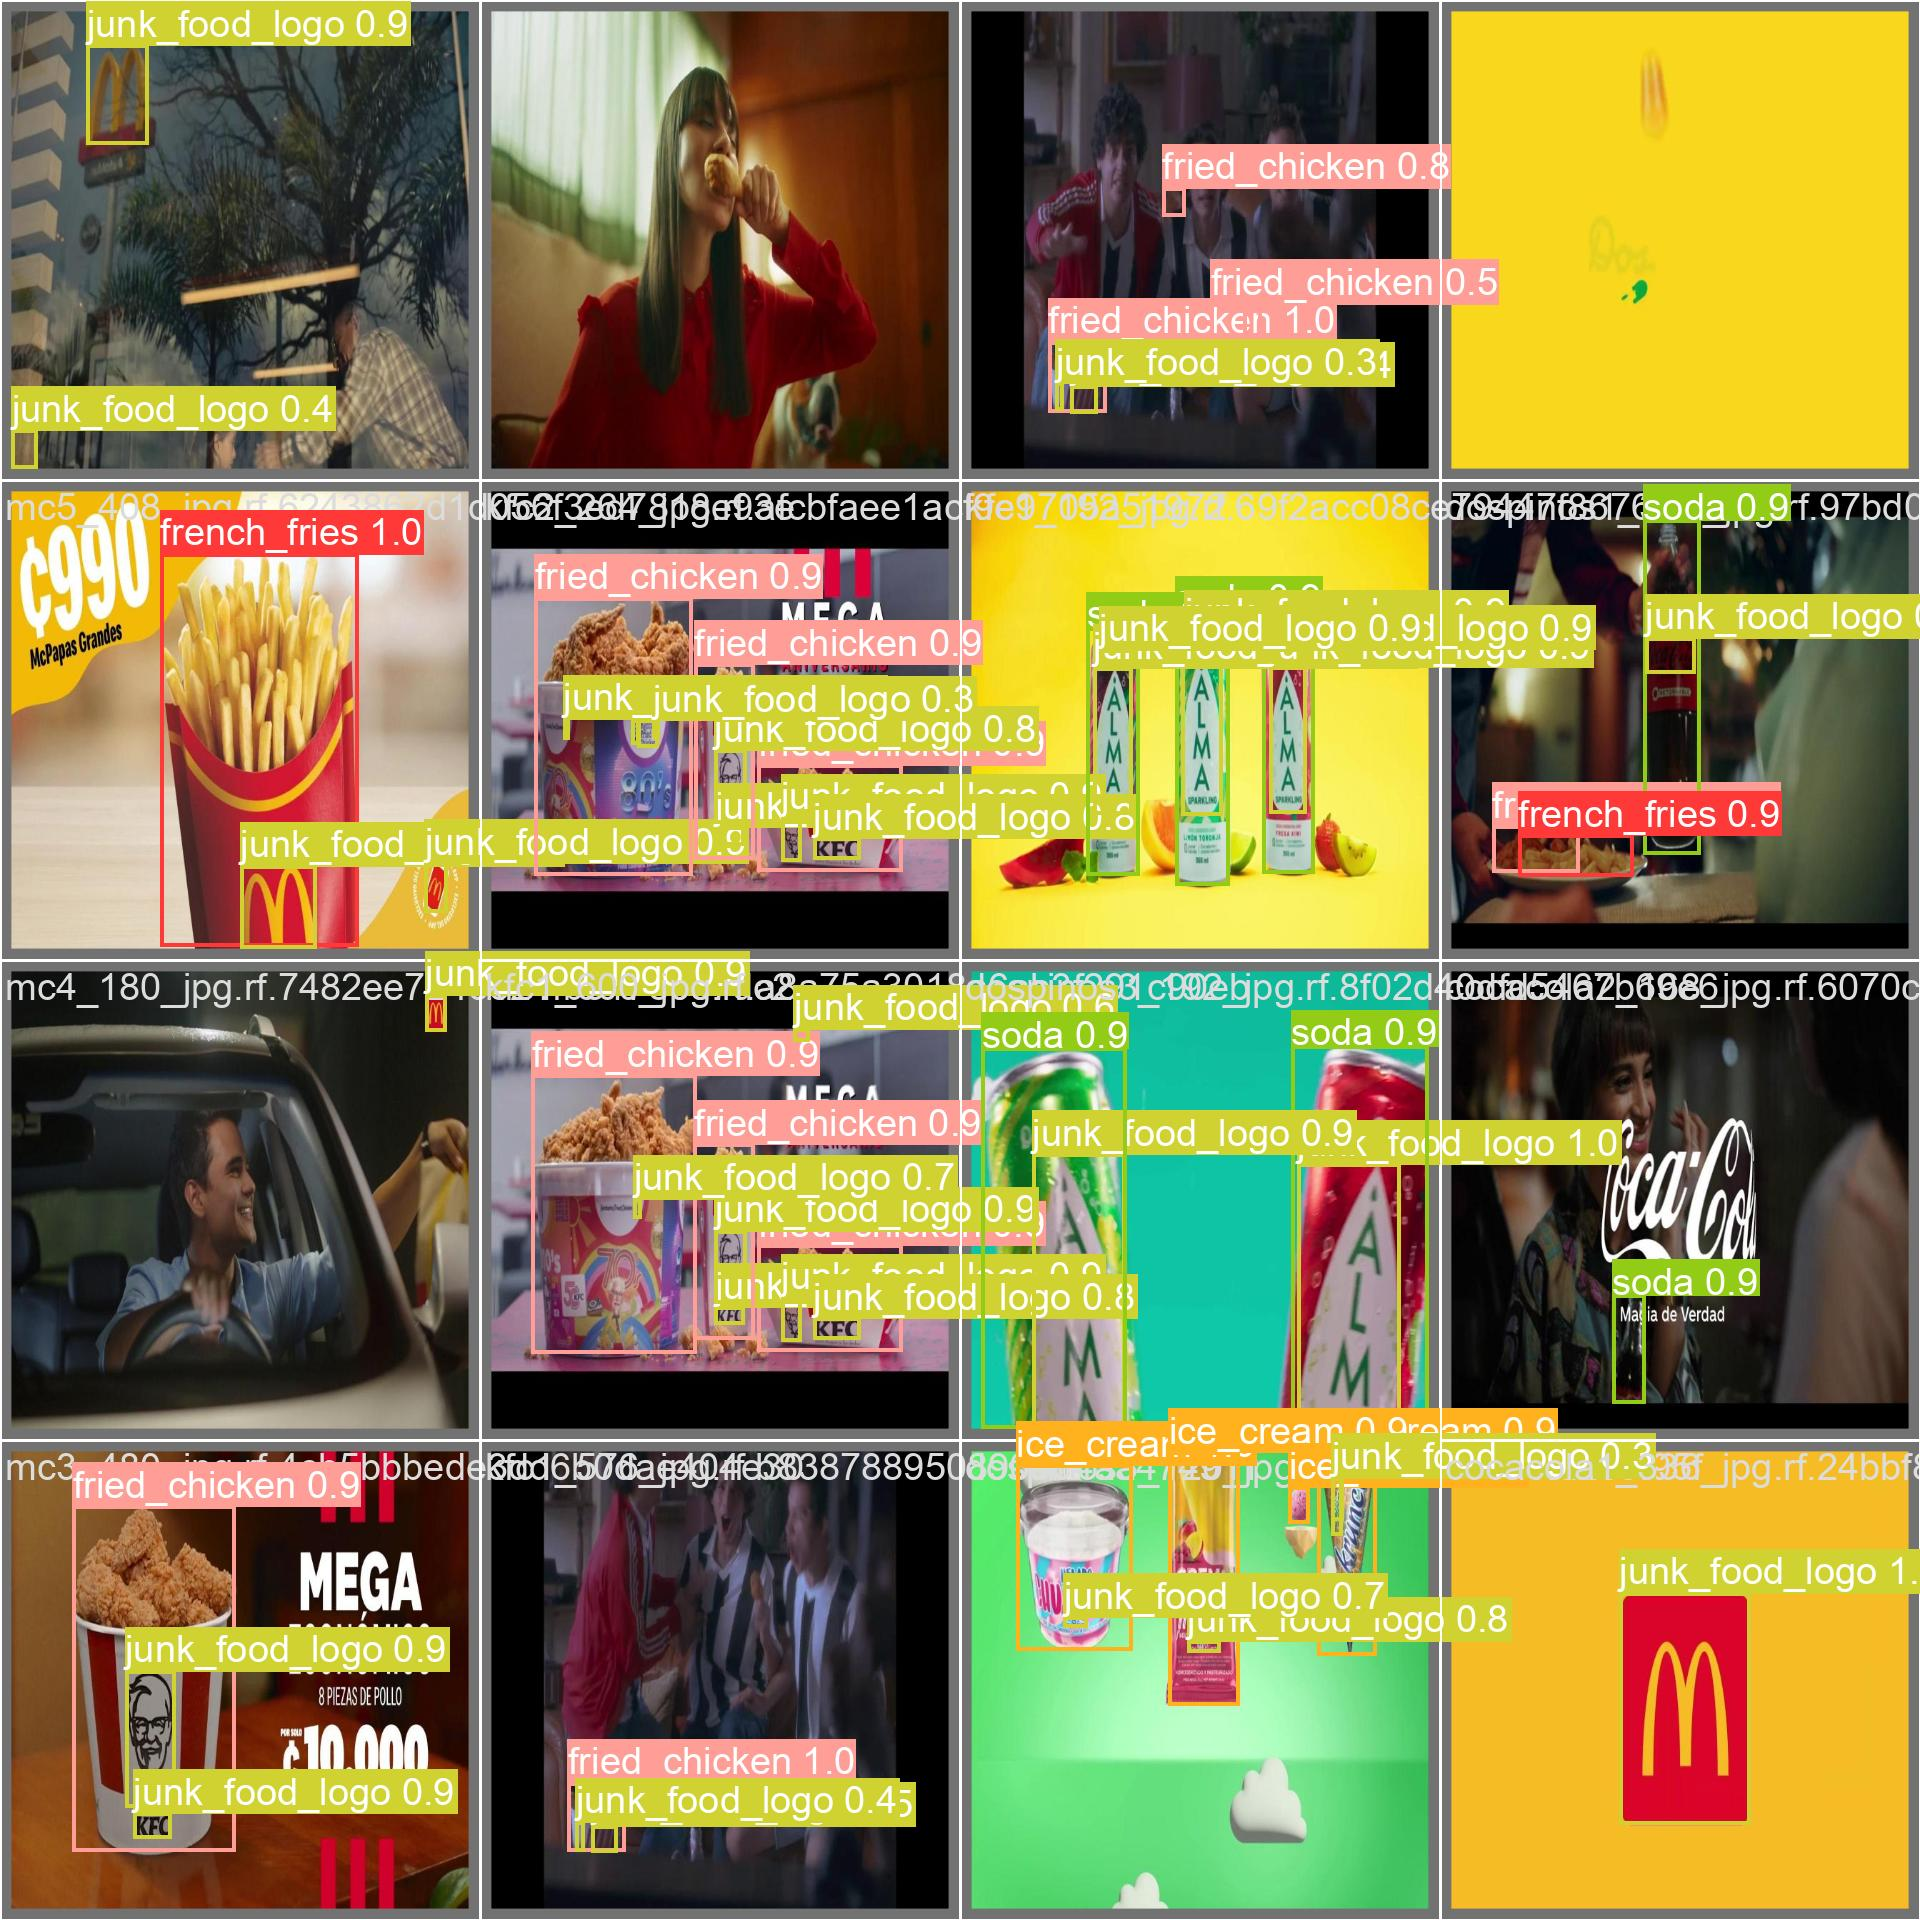

In [ ]:
Image(filename=f'{TEST_PATH}val_batch1_pred.jpg', width=600)

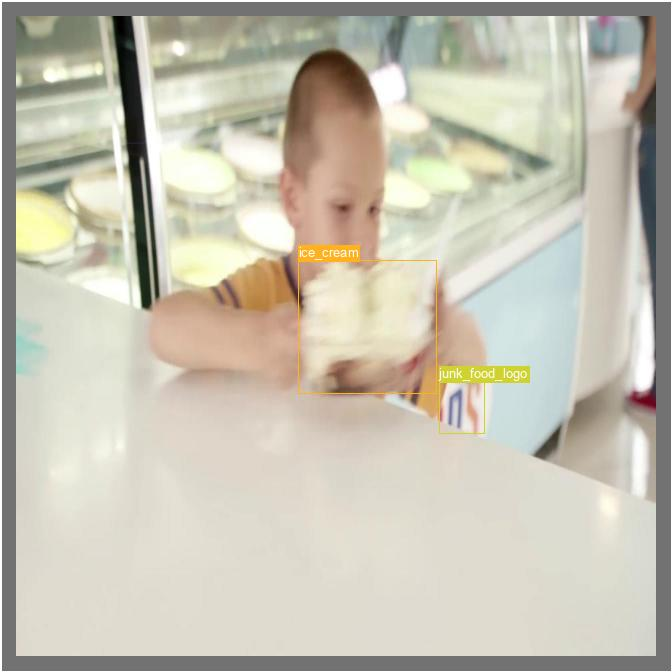

In [ ]:
Image(filename=f'{TEST_PATH}val_batch2_labels.jpg', width=600)

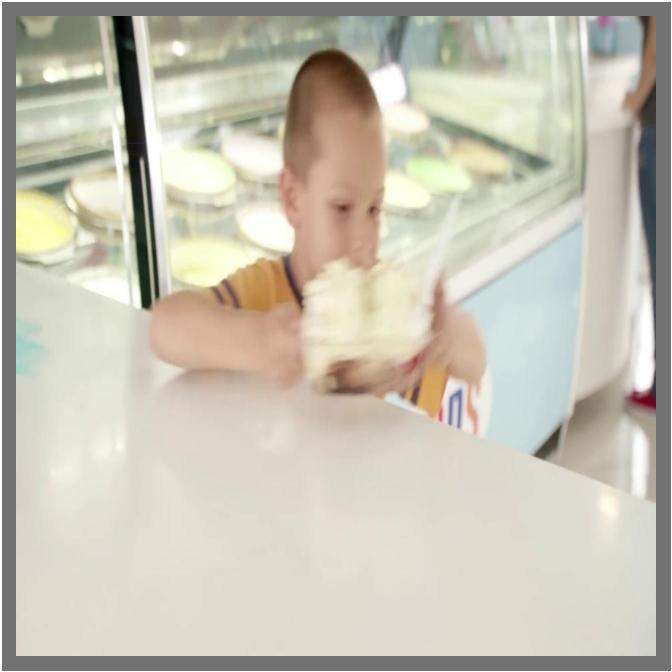

In [ ]:
Image(filename=f'{TEST_PATH}val_batch2_pred.jpg', width=600)